In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/NLP/Bully Detection')
!ls

'Bully Detection.ipynb'   datasets


In [3]:
! pip install langdetect
! pip install contractions
! pip install emoji
! pip install imblearn
! pip install torch
! pip install transformers
! pip install demoji
! pip install nltk
! pip install gensim
! pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=270fb6c08051d13302bfd182b5e0af2c69b5ad2524cc8961a3f7bfc9ec6da862
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.8 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

import re
import string
import emoji
import demoji
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('punkt')
nltk.download('wordnet')


from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
from langdetect import detect,LangDetectException
from sklearn.preprocessing import OneHotEncoder
import contractions
from nltk.tokenize import word_tokenize

from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import precision_recall_curve,average_precision_score,confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.svm import SVC

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset,DataLoader,RandomSampler,SequentialSampler

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GRU, Dropout, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

from collections import Counter
from gensim.models import Word2Vec



import random
seed_value = 2042
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)

import matplotlib.pyplot as plt
import seaborn as sns
sns.despine()
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)
from plotly.offline import iplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<Figure size 640x480 with 0 Axes>

In [6]:
import nltk

nltk_data_dir = '/content/drive/MyDrive/NLP/Bully Detection'

nltk.download('wordnet',download_dir=nltk_data_dir)
nltk.download('omw-1.4',download_dir=nltk_data_dir)
nltk.download('punkt',download_dir=nltk_data_dir)

nltk.data.path.append(nltk_data_dir)

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package wordnet to
[nltk_data]     /content/drive/MyDrive/NLP/Bully Detection...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /content/drive/MyDrive/NLP/Bully Detection...
[nltk_data] Downloading package punkt to
[nltk_data]     /content/drive/MyDrive/NLP/Bully Detection...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
import zipfile

nltk_data_dir = '/content/drive/MyDrive/NLP/Bully Detection'
corpora_dir = os.path.join(nltk_data_dir, "corpora")

if not os.path.exists(corpora_dir):
    os.makedirs(corpora_dir)

for zip_file in ["wordnet.zip", "omw-1.4.zip"]:
    zip_path = os.path.join(corpora_dir, zip_file)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(corpora_dir)

print("Contents of corpora directory after unzipping:", os.listdir(corpora_dir))

import nltk
nltk.data.path.append(nltk_data_dir)

try:
    from nltk.corpus import wordnet
    print("WordNet path:", wordnet.root)
    print("Sample Synset:", wordnet.synsets('computer'))
except LookupError as e:
    print("Error accessing WordNet:", e)

Contents of corpora directory after unzipping: ['wordnet.zip', 'omw-1.4.zip', 'wordnet', 'omw-1.4']
WordNet path: /content/drive/MyDrive/NLP/Bully Detection/corpora/wordnet
Sample Synset: [Synset('computer.n.01'), Synset('calculator.n.01')]


In [8]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [9]:
df = pd.read_csv('datasets/cyberbullying_tweets.csv')

In [10]:
df

tweet_text cyberbullying_type
0      In other words #katandandre, your food was cra...  not_cyberbullying
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
...                                                  ...                ...
47687  Black ppl aren't expected to do anything, depe...          ethnicity
47688  Turner did not withhold his disappointment. Tu...          ethnicity
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity

[47692 rows x 2 columns]

In [11]:
df2 = pd.read_csv('datasets/aggression_parsed_dataset.csv')

In [12]:
df2

index                                               Text  ed_label_0  \
0            0  `- This is not ``creative``.  Those are the di...    0.900000   
1            1  `  :: the term ``standard model`` is itself le...    1.000000   
2            2    True or false, the situation as of March 200...    1.000000   
3            3   Next, maybe you could work on being less cond...    0.555556   
4            4               This page will need disambiguation.     1.000000   
...        ...                                                ...         ...   
115859  115859  `   These sources don't exactly exude a sense ...    0.777778   
115860  115860    The Institute for Historical Review is a pee...    1.000000   
115861  115861   :The way you're trying to describe it in this...    1.000000   
115862  115862    == Warning ==  There is clearly a protection...    0.500000   
115863  115863  Alternate option=== Is there perhaps enough ne...    1.000000   

        ed_label_1  oh_label  
0         0.100000         0  
1         0.000000         0  
2         0.000000         0  
3         0.444444         0  
4         0.000000         0  
...            ...       ...  
115859    0.222222         0  
115860    0.000000         0  
115861    0.000000         0  
115862    0.500000         0  
115863    0.000000         0  

[115864 rows x 5 columns]

In [13]:
useful_columns = ['Text','oh_label']
df2 = df2[useful_columns]

In [14]:
df2['oh_label'].value_counts()

oh_label
0    101082
1     14782
Name: count, dtype: int64

In [15]:
df2 = df2.rename(columns={'Text':'tweet_text','oh_label':'cyberbullying_type'})

In [16]:
df2

tweet_text  cyberbullying_type
0       `- This is not ``creative``.  Those are the di...                   0
1       `  :: the term ``standard model`` is itself le...                   0
2         True or false, the situation as of March 200...                   0
3        Next, maybe you could work on being less cond...                   0
4                    This page will need disambiguation.                    0
...                                                   ...                 ...
115859  `   These sources don't exactly exude a sense ...                   0
115860    The Institute for Historical Review is a pee...                   0
115861   :The way you're trying to describe it in this...                   0
115862    == Warning ==  There is clearly a protection...                   0
115863  Alternate option=== Is there perhaps enough ne...                   0

[115864 rows x 2 columns]

In [17]:
df2.iloc[115840][0]

' shut up mind your own business and go fuck some one else over   '

In [18]:
not_bully_df = df2[df2['cyberbullying_type'] == 0]

In [19]:
not_bully_df['text_len'] = [len(text.split()) for text in not_bully_df.tweet_text];
not_bully_df

tweet_text  cyberbullying_type  \
0       `- This is not ``creative``.  Those are the di...                   0   
1       `  :: the term ``standard model`` is itself le...                   0   
2         True or false, the situation as of March 200...                   0   
3        Next, maybe you could work on being less cond...                   0   
4                    This page will need disambiguation.                    0   
...                                                   ...                 ...   
115859  `   These sources don't exactly exude a sense ...                   0   
115860    The Institute for Historical Review is a pee...                   0   
115861   :The way you're trying to describe it in this...                   0   
115862    == Warning ==  There is clearly a protection...                   0   
115863  Alternate option=== Is there perhaps enough ne...                   0   

        text_len  
0            386  
1            123  
2             59  
3             75  
4              5  
...          ...  
115859       111  
115860        74  
115861        33  
115862       133  
115863        39  

[101082 rows x 3 columns]

In [20]:
not_bully_df = not_bully_df[not_bully_df['text_len'] < 50]
random_rows = not_bully_df.sample(n=1700)
random_rows

tweet_text  cyberbullying_type  \
38982  `  == ``Polka Dot`` vs. ``Polkadot`` ==  Accor...                   0   
44248  ` :You'll have to research and find the AfD.  ...                   0   
41372   *No problem - glad to hear it's being sorted.                      0   
79723   :::::I see no worries at all about sourcing t...                   0   
64058   2009 (UTC)  ==Warning== This is the second ti...                   0   
...                                                  ...                 ...   
94662  MESSAGE FOR KEITH D - UP YOURS YOU SMEG-SATURA...                   0   
2448     ==Some more== :Snowspinner Oh. Hi Irate. Did...                   0   
63666  We do list it on our article on hypercomputati...                   0   
42712                    `  == User Warning(s) ==    , `                   0   
24592  `  == Vilem Flusser ==  Hi, done. Feel free to...                   0   

       text_len  
38982        26  
44248        36  
41372         9  
79723        12  
64058        32  
...         ...  
94662        10  
2448         36  
63666        10  
42712         7  
24592        14  

[1700 rows x 3 columns]

In [21]:
random_rows['cyberbullying_type'] = random_rows['cyberbullying_type'].replace(0,'not_cyberbullying')
random_rows = random_rows.drop(columns=['text_len'])

In [22]:
df = pd.concat([df,random_rows])
df

tweet_text cyberbullying_type
0      In other words #katandandre, your food was cra...  not_cyberbullying
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
...                                                  ...                ...
94662  MESSAGE FOR KEITH D - UP YOURS YOU SMEG-SATURA...  not_cyberbullying
2448     ==Some more== :Snowspinner Oh. Hi Irate. Did...  not_cyberbullying
63666  We do list it on our article on hypercomputati...  not_cyberbullying
42712                    `  == User Warning(s) ==    , `  not_cyberbullying
24592  `  == Vilem Flusser ==  Hi, done. Feel free to...  not_cyberbullying

[49392 rows x 2 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49392 entries, 0 to 24592
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          49392 non-null  object
 1   cyberbullying_type  49392 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [24]:
df = df.rename(columns={'tweet_text':'text','cyberbullying_type':'sentiment'})

In [25]:
print(f'Number of duplicated tweets',df.duplicated().sum())
df = df[~df.duplicated()]

Number of duplicated tweets 36


In [26]:
df['sentiment'].value_counts()

sentiment
not_cyberbullying      9637
religion               7997
age                    7992
ethnicity              7959
gender                 7948
other_cyberbullying    7823
Name: count, dtype: int64

In [27]:
def remove_emoji(text):
  return demoji.replace(text,'')

In [28]:
def remove_all_entities(text):
  text = re.sub(r'\r|\n',' ',text.lower())
  text = re.sub(r'(?:\@|https?\://)\S+','',text)
  text = re.sub(r'[^\x00-\x7f]','',text)
  banned_list = string.punctuation
  table = str.maketrans('','',banned_list)
  text = text.translate(table)
  text = ' '.join(word for word in text.split() if word not in stop_words)
  return text

In [29]:
def clean_hashtags(tweet):
  new_tweet = re.sub(r'(\s+#[\w-]+)+\s*$','',tweet).strip()
  new_tweet = re.sub(r'#([\w-]+)',r'\1',new_tweet).strip()
  return new_tweet

In [30]:
def remove_chars(text):
  return ' '.join('' if  ('$' in word) or ('&' in word) else word for word in text.split())

In [31]:
def remove_mult_spaces(text):
  return re.sub(r'\s\s+',' ',text)

In [32]:
def remove_non_english(text):
  try:
    language = detect(text)
  except LangDetectException:
    language = 'unknown'
  return text if language == 'en' else ''

In [33]:
def expand_contractions(text):
  return contractions.fix(text)

In [34]:
def remove_numbers(text):
  return re.sub(r'\d+','',text)

In [35]:
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
  words = word_tokenize(text)
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  return ' '.join(lemmatized_words)

In [36]:
def remove_short_words(text,min_len=2):
  words = text.split()
  long_words = [word for word in words if len(word) >= min_len]
  return ' '.join(long_words)

In [37]:
def correct_elongated_words(text):
  regular_pattern = r'\b(\w+)((\w)\3{2,})(\w*)\b'
  return re.sub(regular_pattern,r'\1\3\4',text)

In [38]:
def remove_repeated_punctuation(text):
  return re.sub(r'[\?\.\!]+(?=[\?\.\!])','',text)

In [39]:
def remove_extra_whitespace(text):
  return ' '.join(text.split())

In [40]:
def remove_url_shorteners(text):
  return re.sub(r'(?:http[s]?://)?(?:www\.)?(?:bit\.ly|goo\.gl|t\.co|tinyurl\.com|tr\.im|is\.gd|cli\.gs|u\.nu|url\.ie|tiny\.cc|alturl\.com|ow\.ly|bit\.do|adoro\.to)\S+', '', text)

In [41]:
def remove_spaces_tweets(tweet):
  return tweet.strip()

In [42]:
def remove_short_tweets(tweet,min_words=3):
  words = tweet.split()
  return tweet if len(words) >= min_words else ''

In [43]:
def clean_tweet(tweet):
  tweet = remove_emoji(tweet)
  tweet = expand_contractions(tweet)
  tweet = remove_non_english(tweet)
  tweet = remove_all_entities(tweet)
  tweet = clean_hashtags(tweet)
  tweet = remove_chars(tweet)
  tweet = remove_mult_spaces(tweet)
  tweet = remove_numbers(tweet)
  tweet = lemmatize(tweet)
  tweet = remove_short_words(tweet)
  tweet = correct_elongated_words(tweet)
  tweet = remove_repeated_punctuation(tweet)
  tweet = remove_extra_whitespace(tweet)
  tweet = remove_url_shorteners(tweet)
  tweet = remove_spaces_tweets(tweet)
  tweet = remove_short_tweets(tweet)
  tweet = ' '.join(tweet.split())
  return tweet

In [44]:
import nltk
nltk.download('punkt_tab')

df['text_clean'] = [clean_tweet(tweet) for tweet in df['text']]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [45]:
df

text          sentiment  \
0      In other words #katandandre, your food was cra...  not_cyberbullying   
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   
...                                                  ...                ...   
94662  MESSAGE FOR KEITH D - UP YOURS YOU SMEG-SATURA...  not_cyberbullying   
2448     ==Some more== :Snowspinner Oh. Hi Irate. Did...  not_cyberbullying   
63666  We do list it on our article on hypercomputati...  not_cyberbullying   
42712                    `  == User Warning(s) ==    , `  not_cyberbullying   
24592  `  == Vilem Flusser ==  Hi, done. Feel free to...  not_cyberbullying   

                                              text_clean  
0                 word katandandre food crapilicious mkr  
1      aussietv white mkr theblock imacelebrityau tod...  
2                        classy whore red velvet cupcake  
3      meh thanks head concerned another angry dude t...  
4      isi account pretending kurdish account like is...  
...                                                  ...  
94662                                                     
2448   snowspinner oh hi irate see mode wikipedia sno...  
63666               list article hypercomputation though  
42712                                                     
24592        vilem flusser hi done feel free edit change  

[49356 rows x 3 columns]

In [46]:
print(f'{int(df["text_clean"].duplicated().sum())} duplicated tweets is removed.')
df.drop_duplicates("text_clean", inplace=True)

6404 duplicated tweets is removed.


In [47]:
df['sentiment'].value_counts()

sentiment
religion               7914
age                    7813
not_cyberbullying      7629
ethnicity              7402
gender                 7290
other_cyberbullying    4904
Name: count, dtype: int64

In [48]:
def get_top_n_gram(corpus,ngram_range,n=None):
  vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq,key=lambda x:x[1],reverse=True)
  return words_freq[:n]

In [49]:
def generate_wordcloud(sentiment,df):
  plt.figure(figsize=(20,10))
  subset = df[df['sentiment'] == sentiment]
  text_sentiment = subset.text_clean.values
  cloud = WordCloud(background_color='black', colormap="Dark2", collocations=False, width=2000, height=1000).generate(" ".join(text_sentiment))
  plt.axis('off')
  plt.title(sentiment.capitalize(),fontsize=40)
  plt.imshow(cloud)
  plt.savefig(f'{sentiment}_wordcloud.svg',format='svg',bbox_inches='tight')
  plt.show()

In [50]:
def plot_ngrams(sentiment, df):
    subset = df[df['sentiment'] == sentiment]
    text_sentiment = subset.text_clean.values

    unigrams = get_top_n_gram(text_sentiment, (1, 1), 10)
    bigrams = get_top_n_gram(text_sentiment, (2, 2), 10)

    unigrams_df = pd.DataFrame(unigrams, columns=['text_clean', 'count'])
    bigrams_df = pd.DataFrame(bigrams, columns=['text_clean', 'count'])

    unigrams_grouped = unigrams_df.groupby('text_clean').sum()['count'].sort_values(ascending=True)
    bigrams_grouped = bigrams_df.groupby('text_clean').sum()['count'].sort_values(ascending=True)

    unigrams_df = unigrams_grouped.reset_index()
    bigrams_df = bigrams_grouped.reset_index()


    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.barplot(x="count", y="text_clean", data=unigrams_df, ax=axes[0], palette="viridis", edgecolor = 'black')
    axes[0].set_xlabel("Count")
    axes[0].set_ylabel("Unigrams")
    axes[0].set_title("Top 10 Unigrams")
    axes[0].xaxis.grid(True, alpha=0.3)


    sns.barplot(x="count", y="text_clean", data=bigrams_df, ax=axes[1], palette="viridis", edgecolor = 'black')
    axes[1].set_xlabel("Count")
    axes[1].set_ylabel("Bigrams")
    axes[1].set_title("Top 10 Bigrams")
    axes[1].xaxis.grid(True, alpha=0.3)


    plt.tight_layout()
    plt.suptitle(f'Top 10 Ngrams in {sentiment.capitalize()}', fontsize=16)
    plt.show()

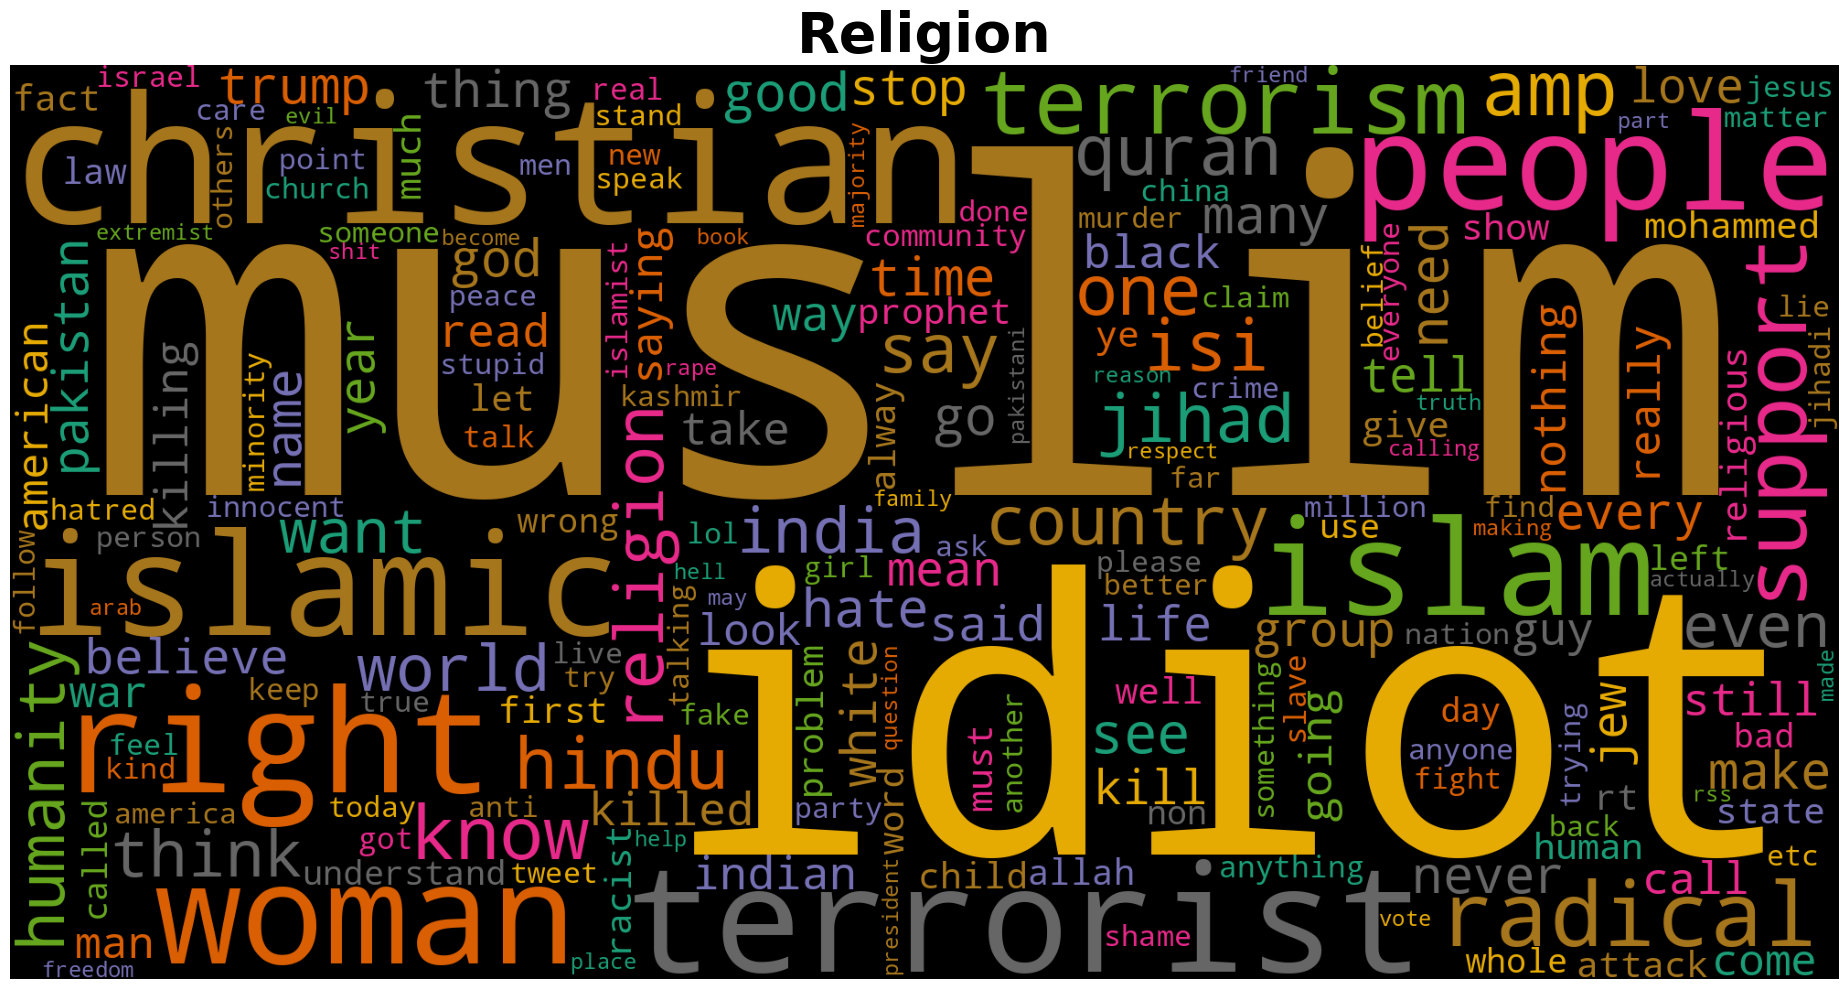

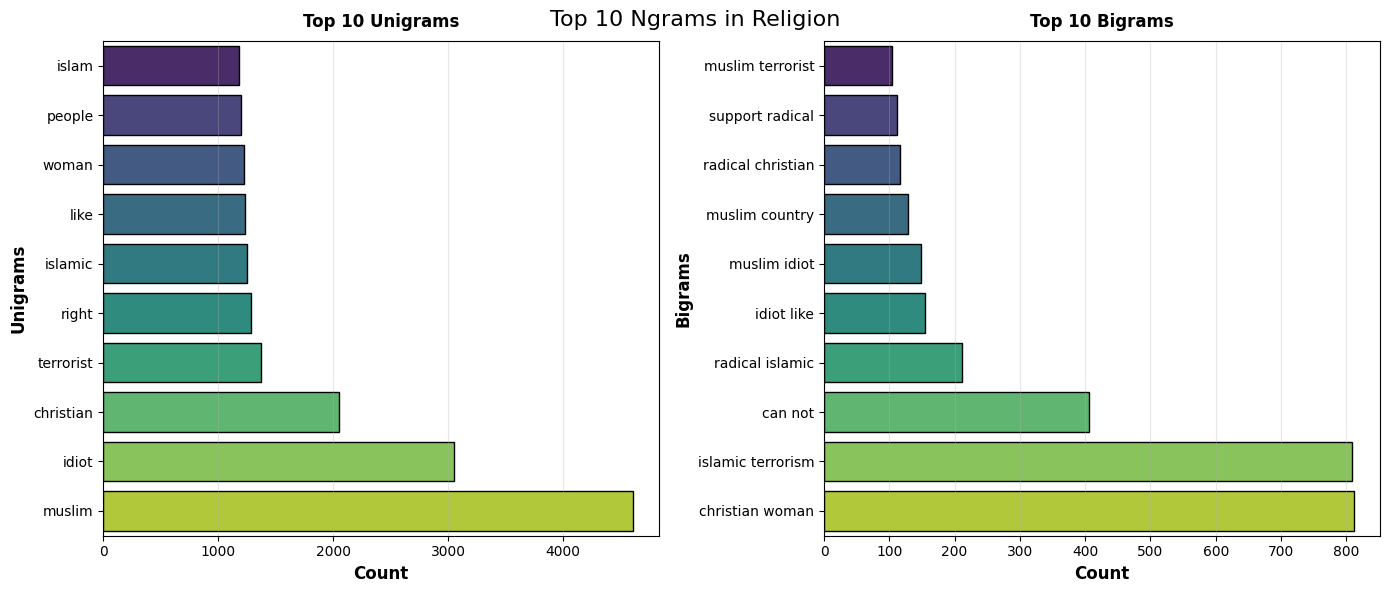

In [51]:
generate_wordcloud('religion', df)
plot_ngrams('religion', df)

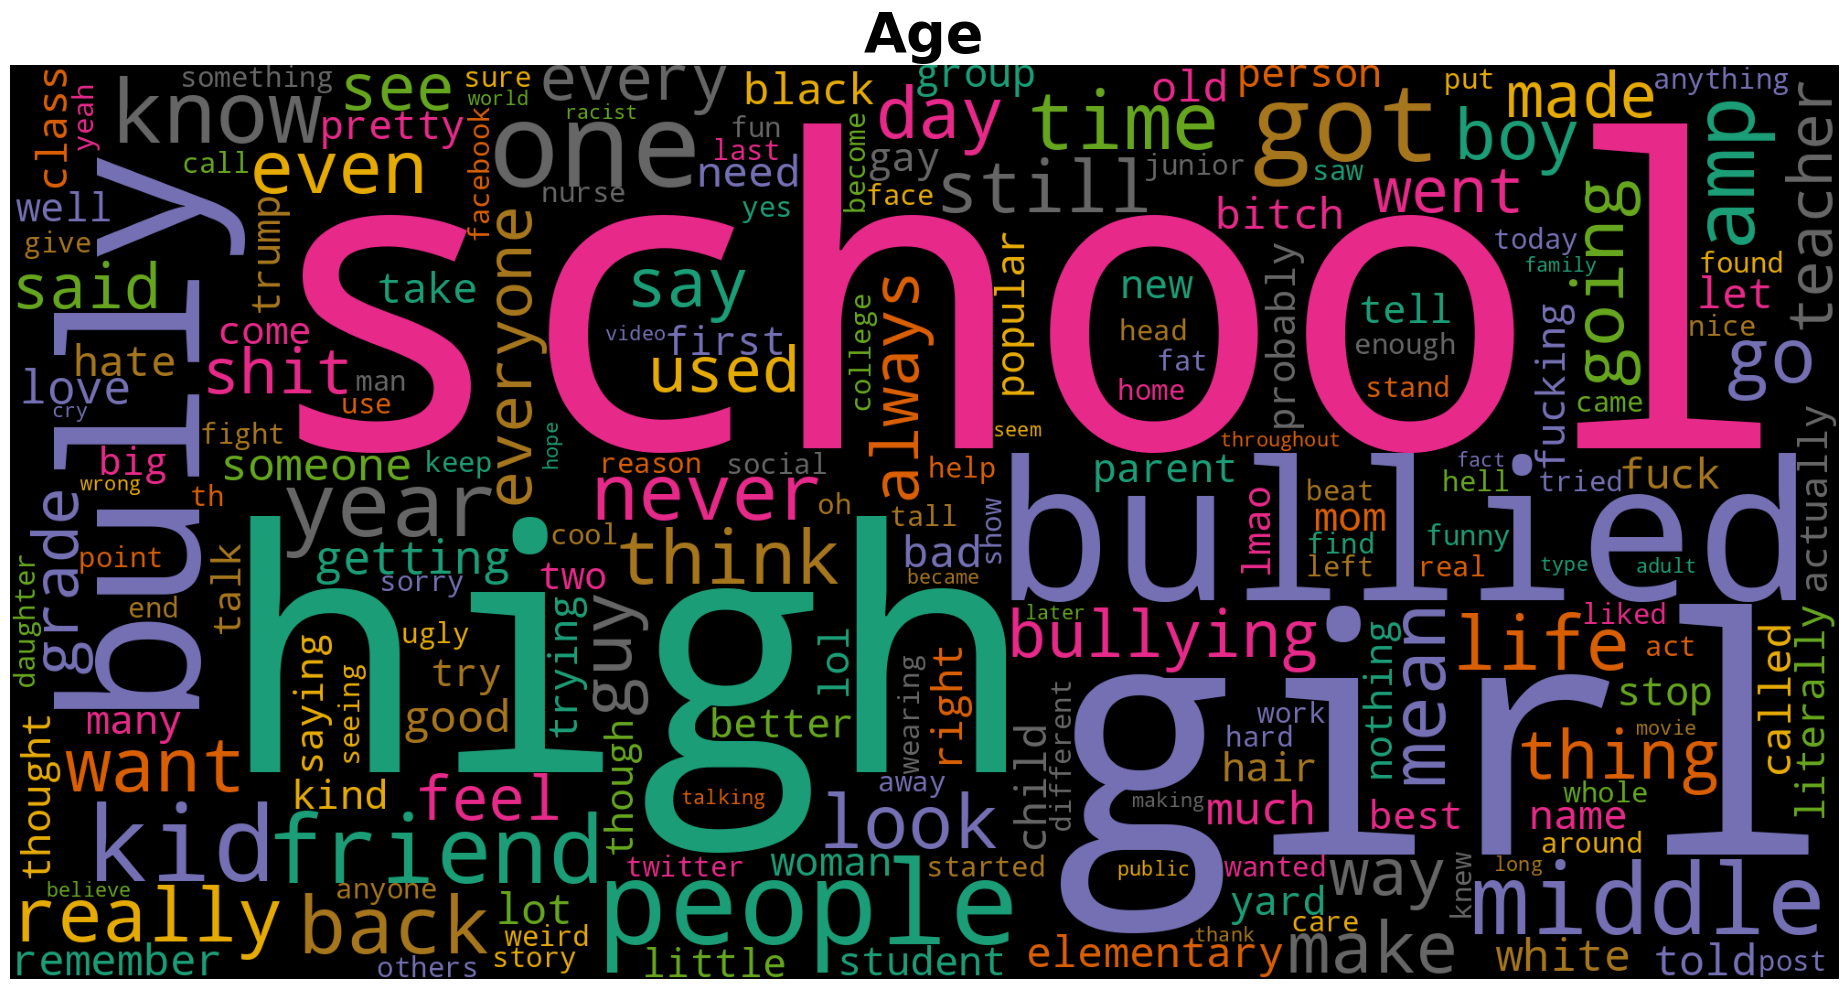

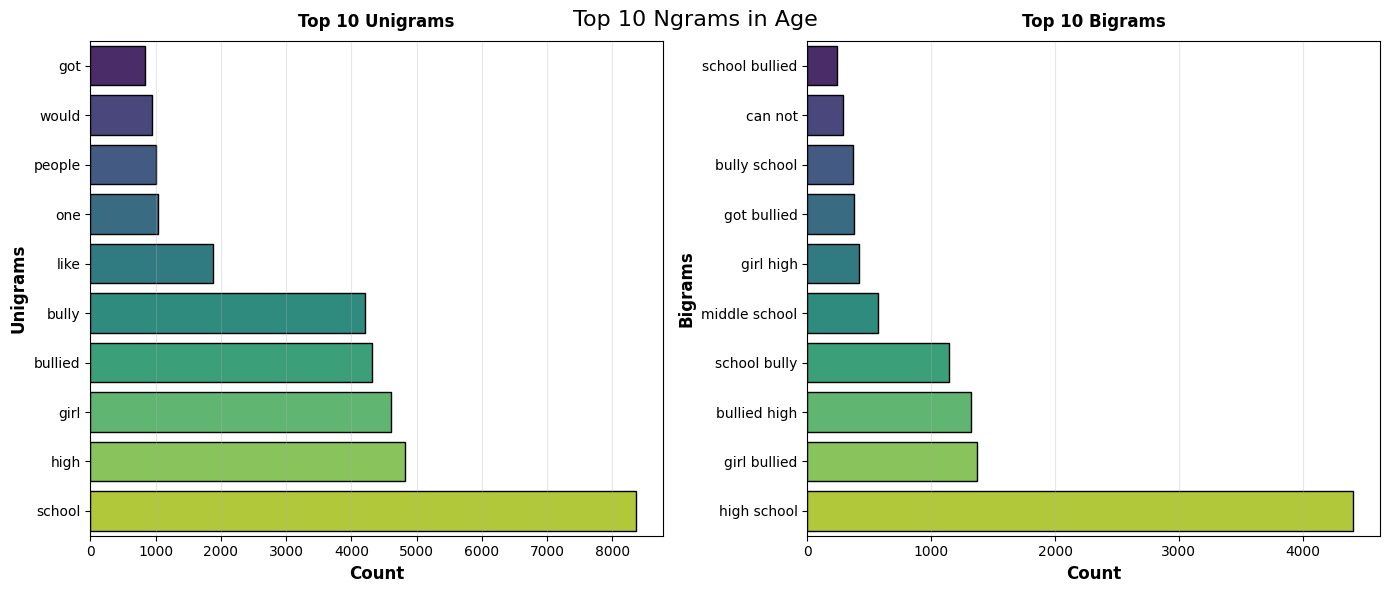

In [52]:
generate_wordcloud('age', df)
plot_ngrams('age', df)

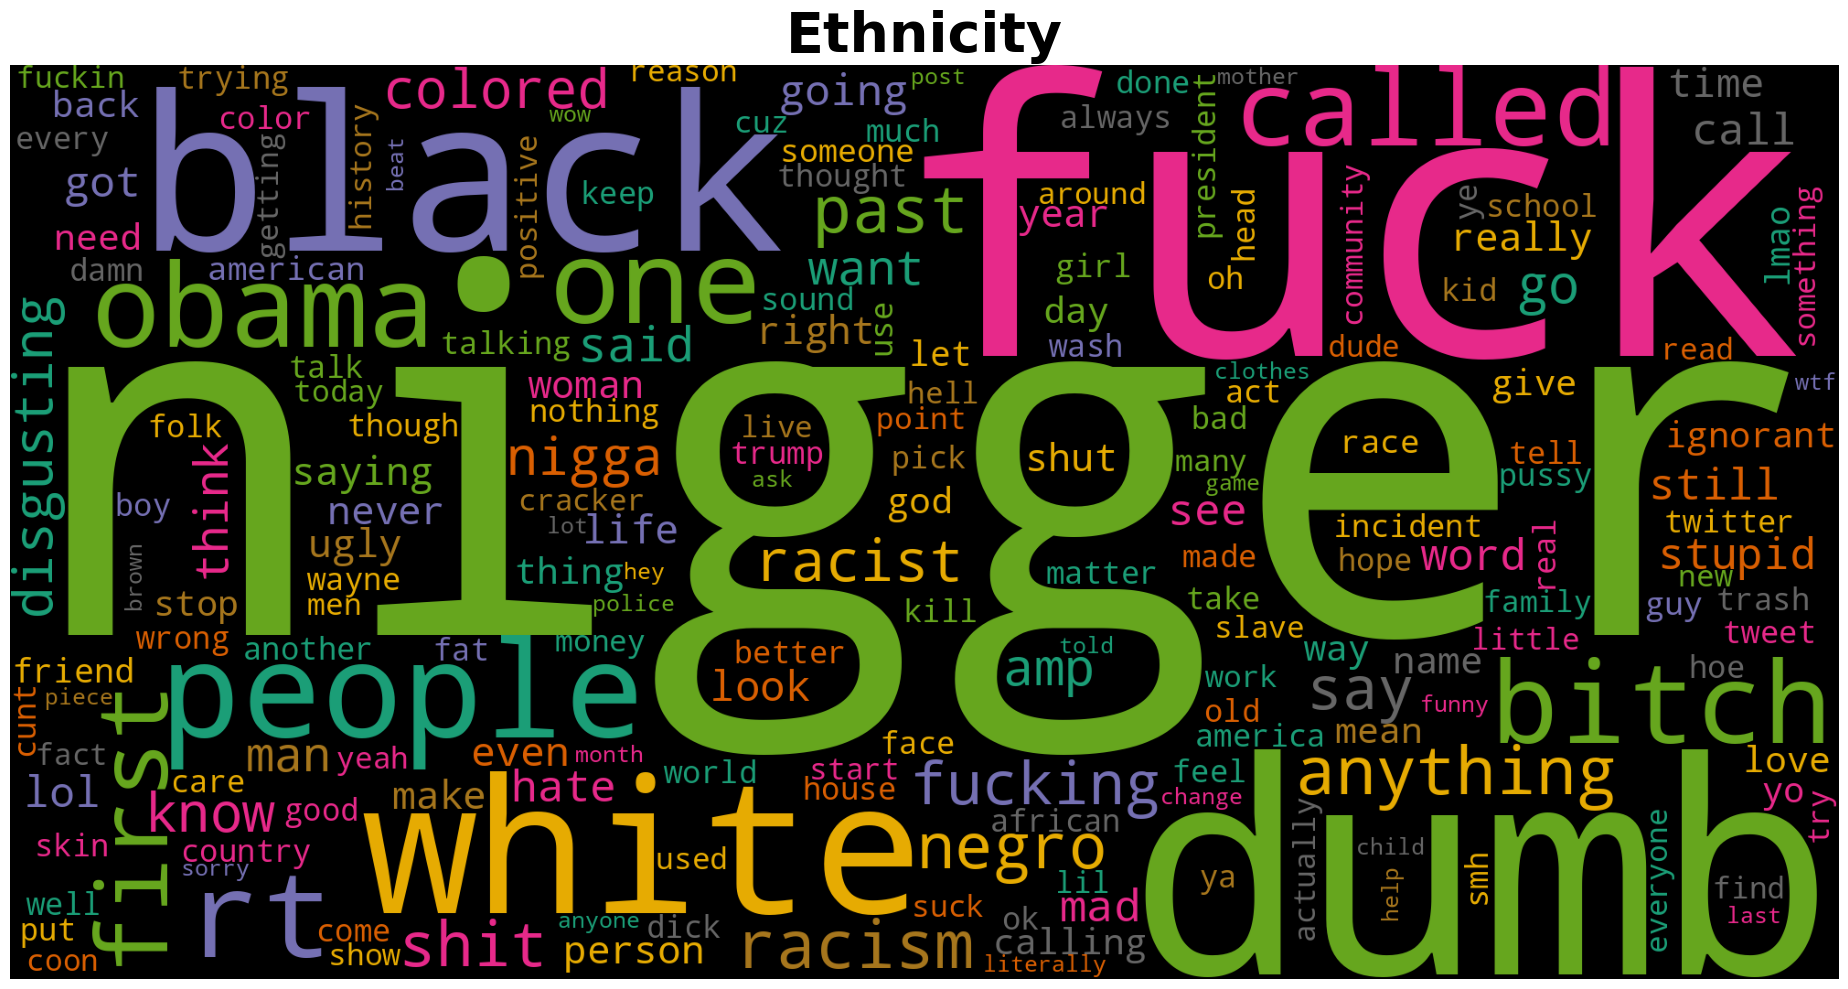

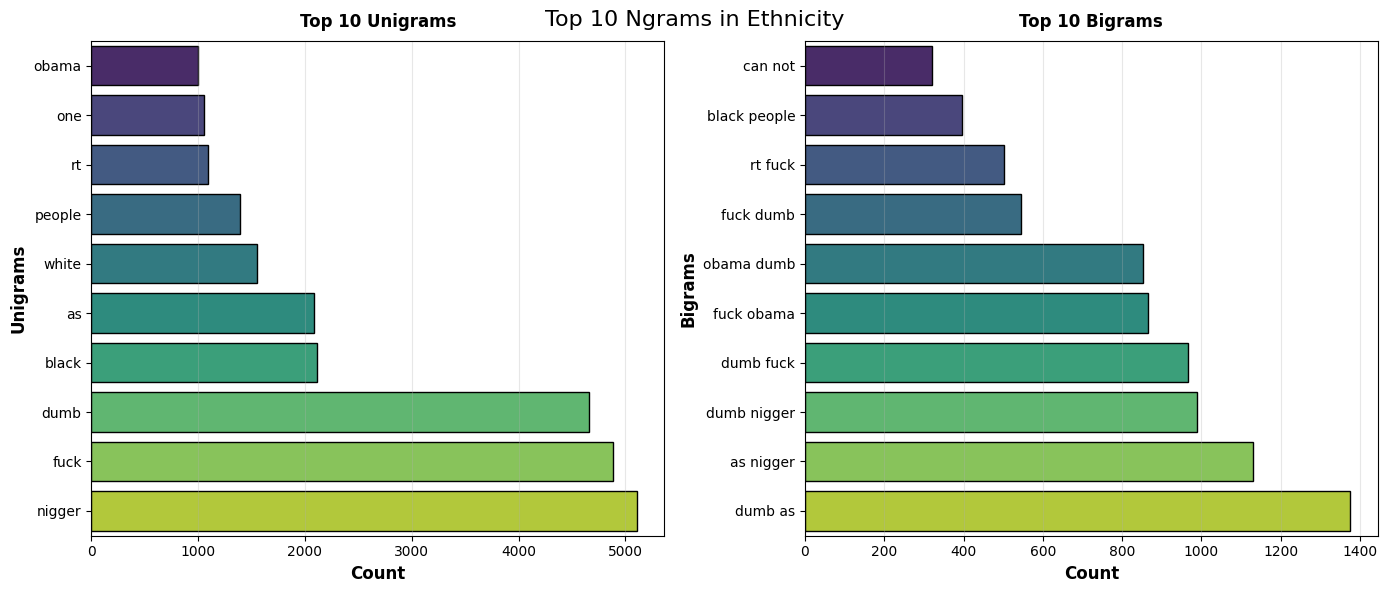

In [53]:
generate_wordcloud('ethnicity', df)
plot_ngrams('ethnicity', df)

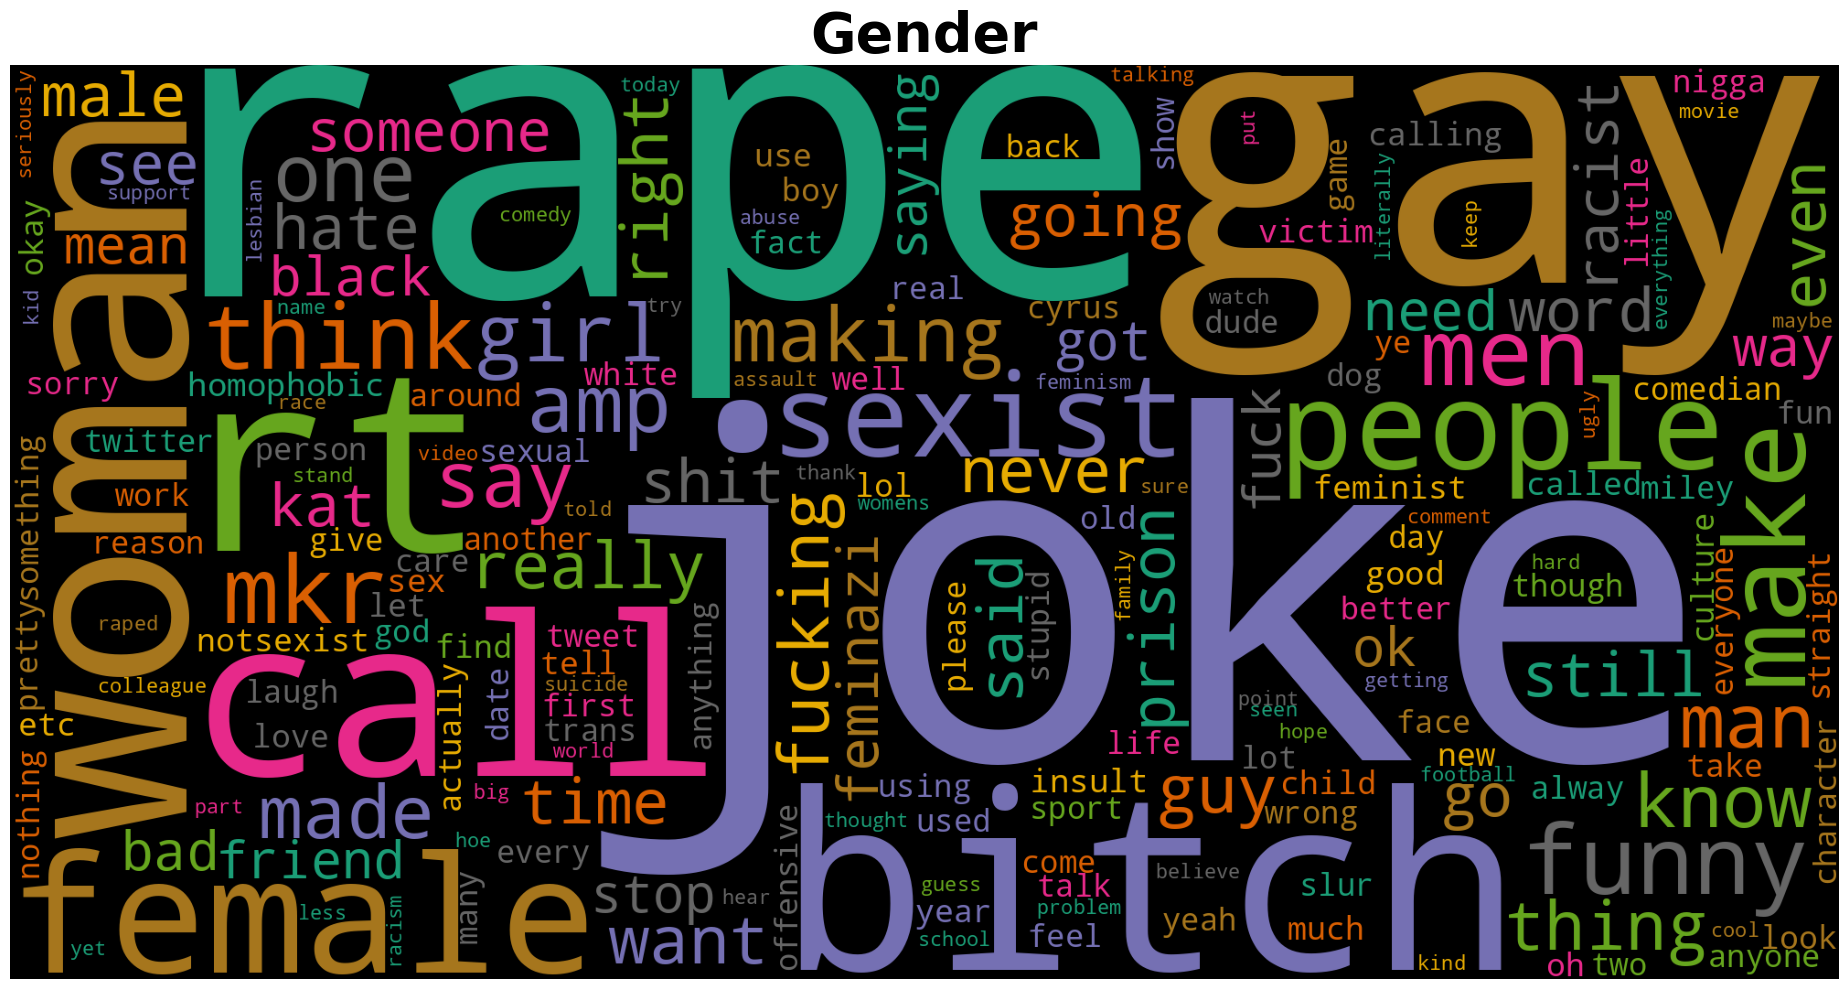

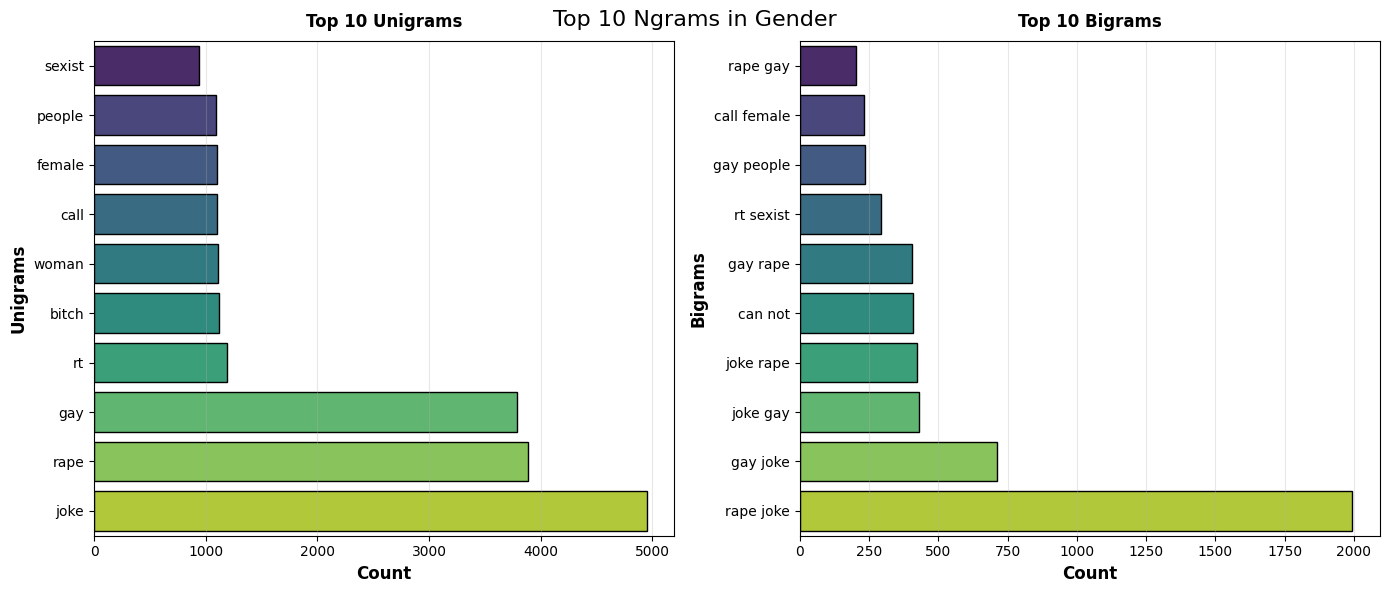

In [54]:
generate_wordcloud('gender', df)
plot_ngrams('gender', df)

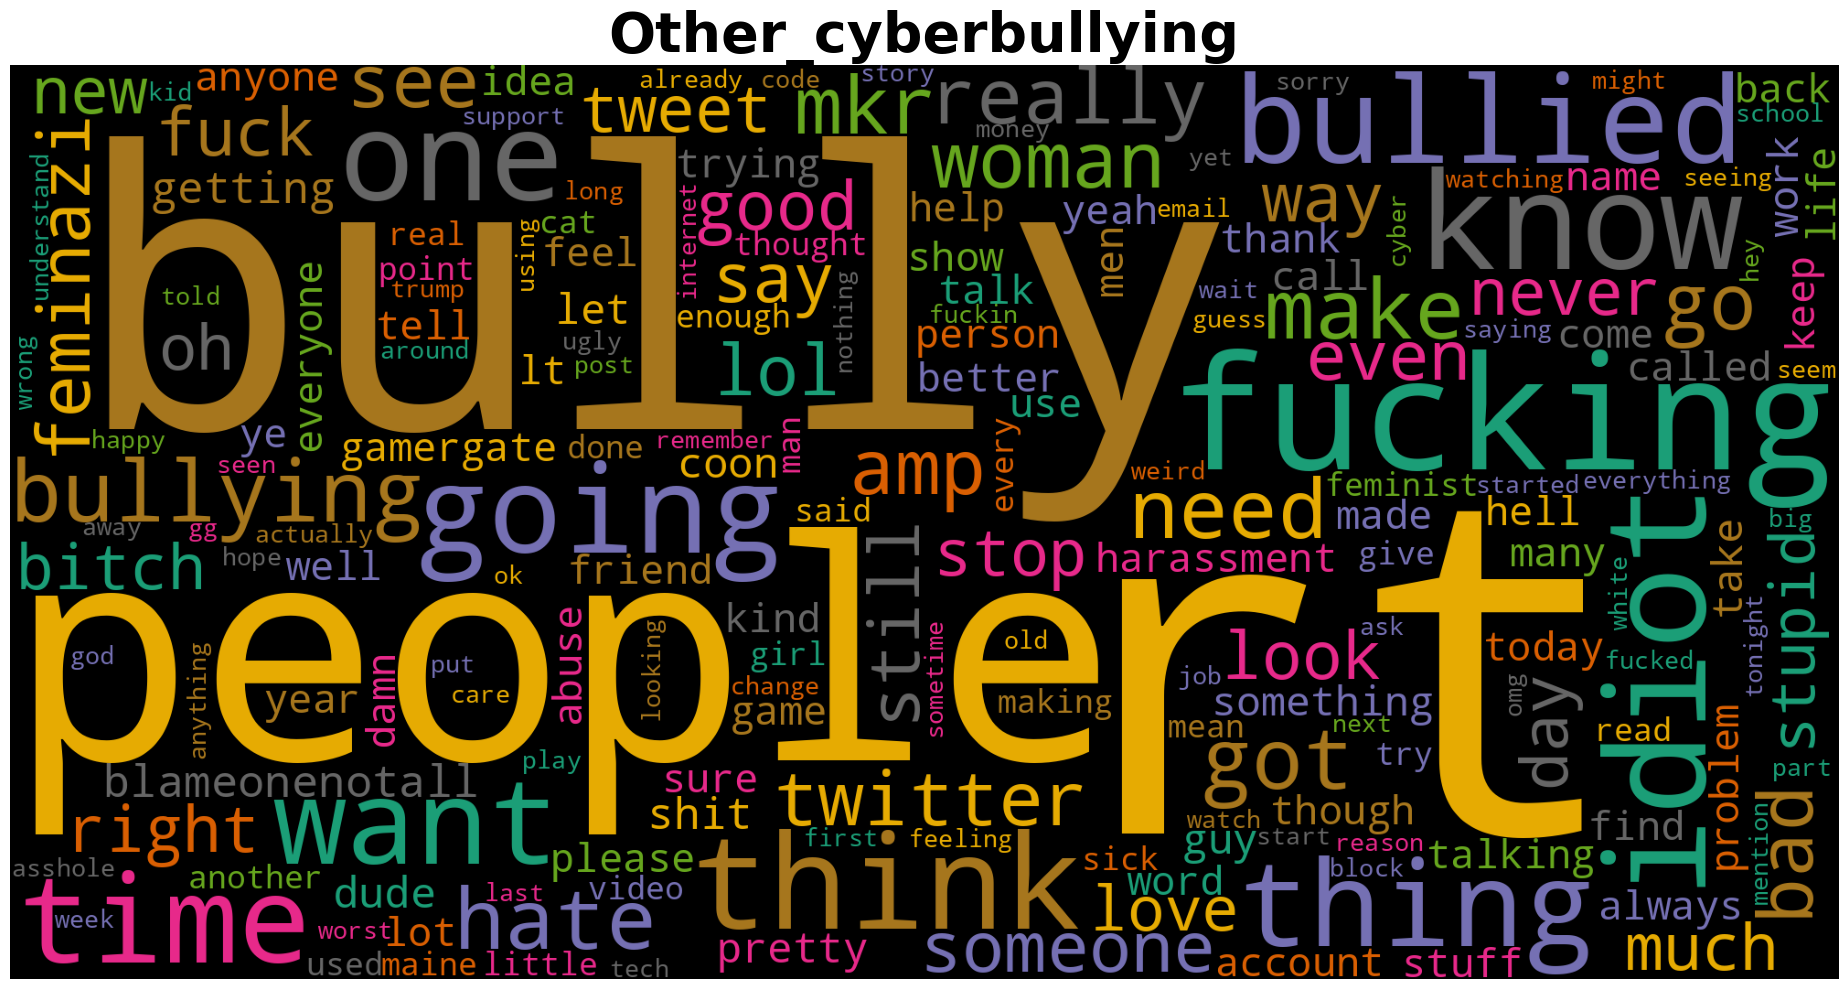

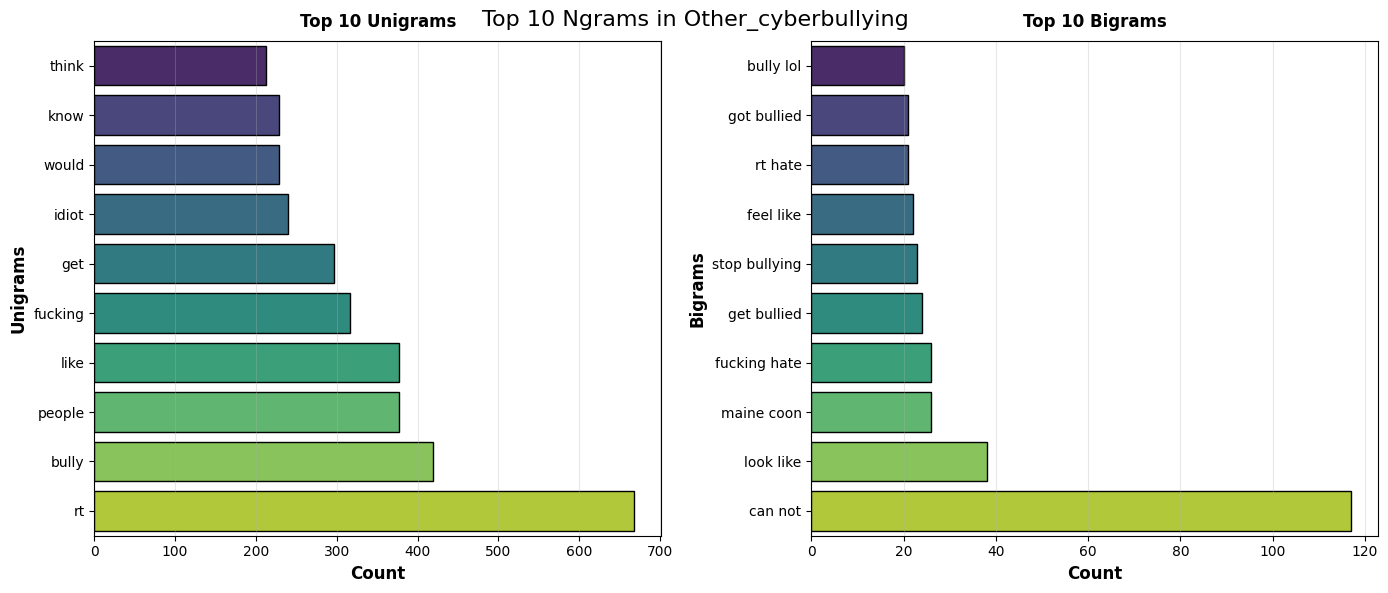

In [55]:
generate_wordcloud('other_cyberbullying', df)
plot_ngrams('other_cyberbullying', df)

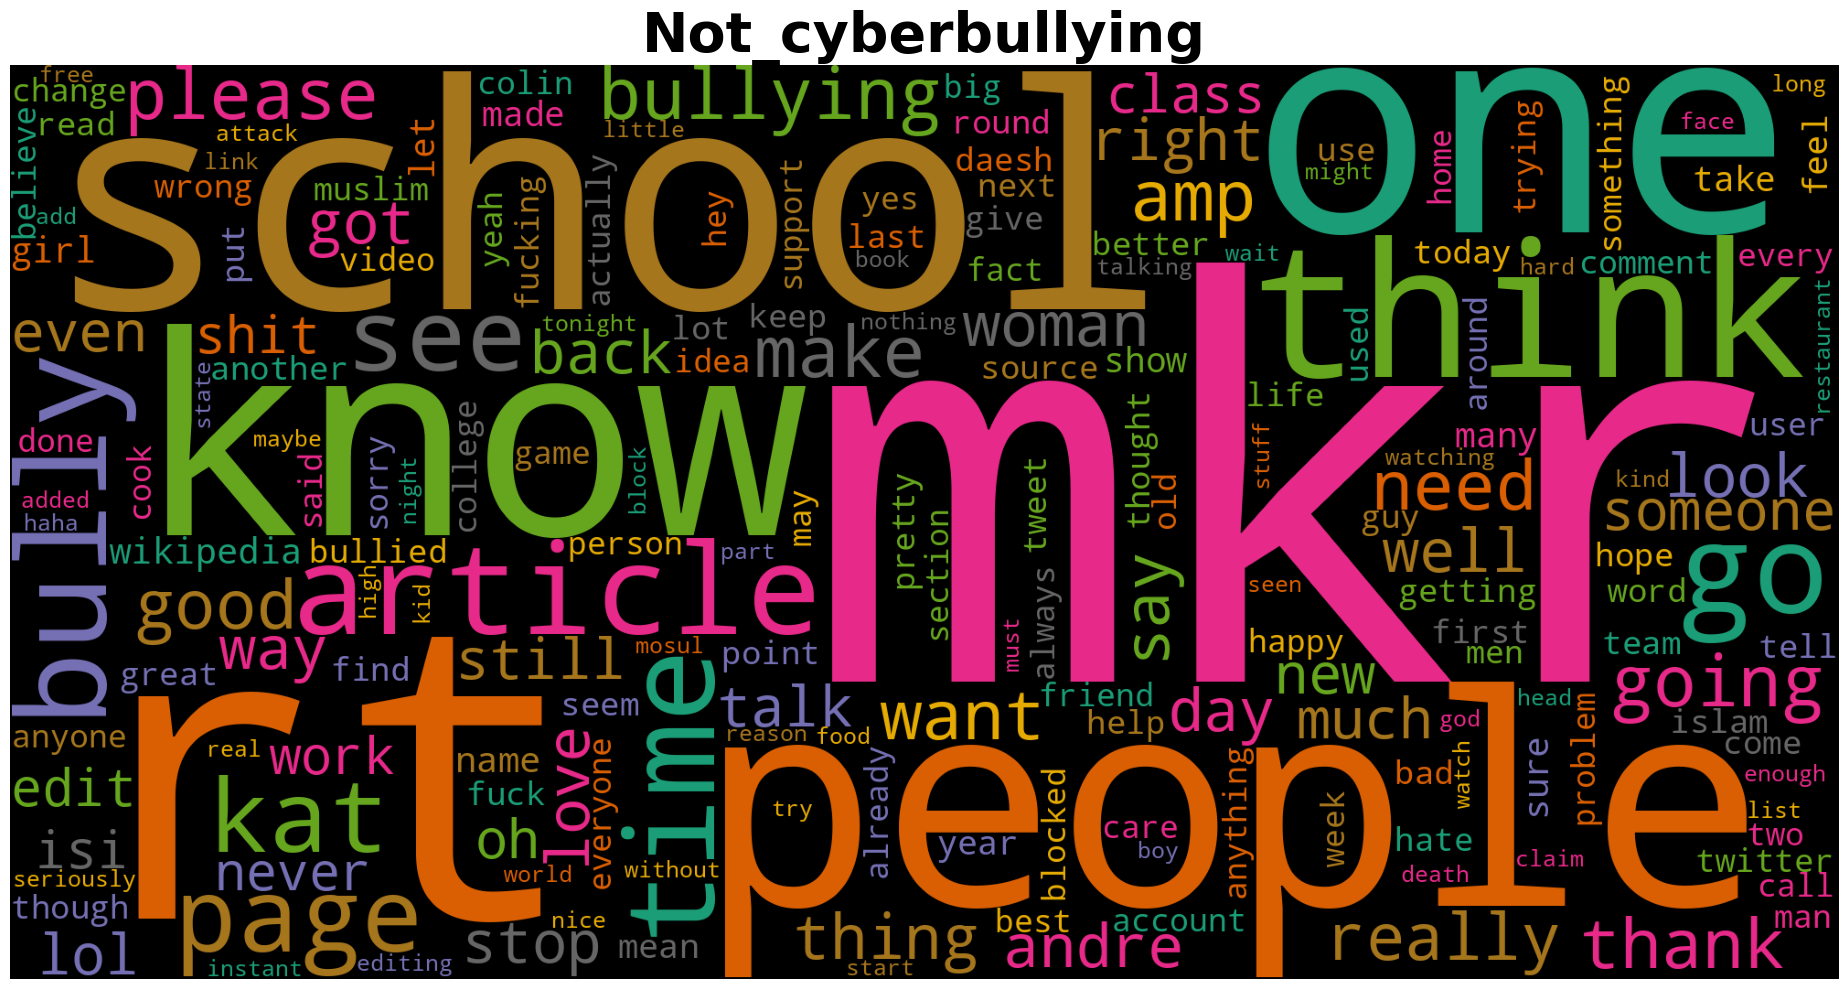

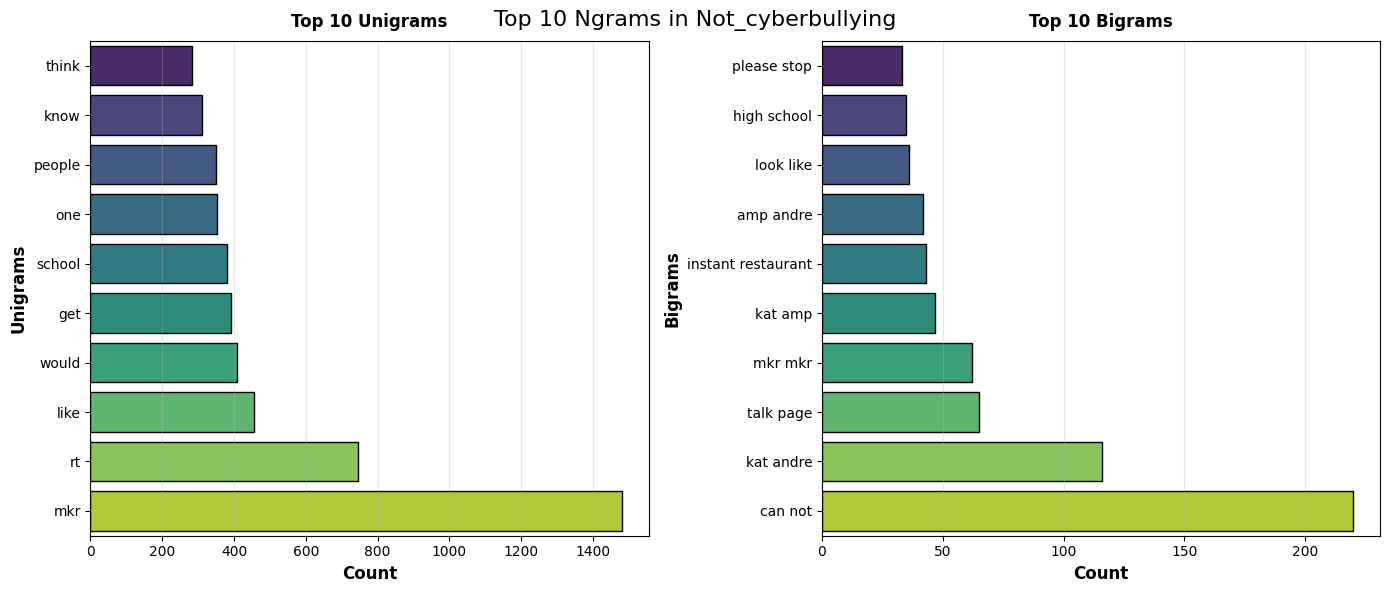

In [56]:
generate_wordcloud('not_cyberbullying', df)
plot_ngrams('not_cyberbullying', df)

In [57]:
df = df[df['sentiment'] != 'other_cyberbullying']

In [58]:
sentiments = ['religion','age','ethnicity','gender','not bullying']

In [59]:
df['text_len'] = [len(text.split()) for text in df.text_clean]

In [60]:
df.sort_values(by=['text_len'],ascending=False)

text          sentiment  \
44035  You so black and white trying to live like a n...          ethnicity   
45165  @hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass ...          ethnicity   
1317   @EurekAlertAAAS: Researchers push to import to...  not_cyberbullying   
33724  ... I don't feel guilty for killing him, I jus...                age   
10922  don't make rape jokes!!! don't make gay jokes!...             gender   
...                                                  ...                ...   
30599               == DRM ==  Has the DRM been cracked?  not_cyberbullying   
5815   @coconono under my clothes. :P  the cape is in...  not_cyberbullying   
11639                  @mcall Repeating the lies, I see.             gender   
3568   #mkr just isn't the same without @chloejames__...  not_cyberbullying   
6      Itu sekolah ya bukan tempat bully! Ga jauh kay...  not_cyberbullying   

                                              text_clean  text_len  
44035  black white trying live like nigger pahahahaha...       173  
45165  fuck obama dumb as nigger bitch ltthis whore s...       151  
1317   researcher push import top antibullying progra...       138  
33724  feel guilty killing feel guilty enjoyed tormen...       136  
10922  make rape joke make gay joke oh fat joke okay ...       121  
...                                                  ...       ...  
30599                                    drm drm cracked         3  
5815                               clothes cape backpack         3  
11639                                  repeating lie see         3  
3568                                   mkr without kelly         3  
6                                                                0  

[38048 rows x 4 columns]

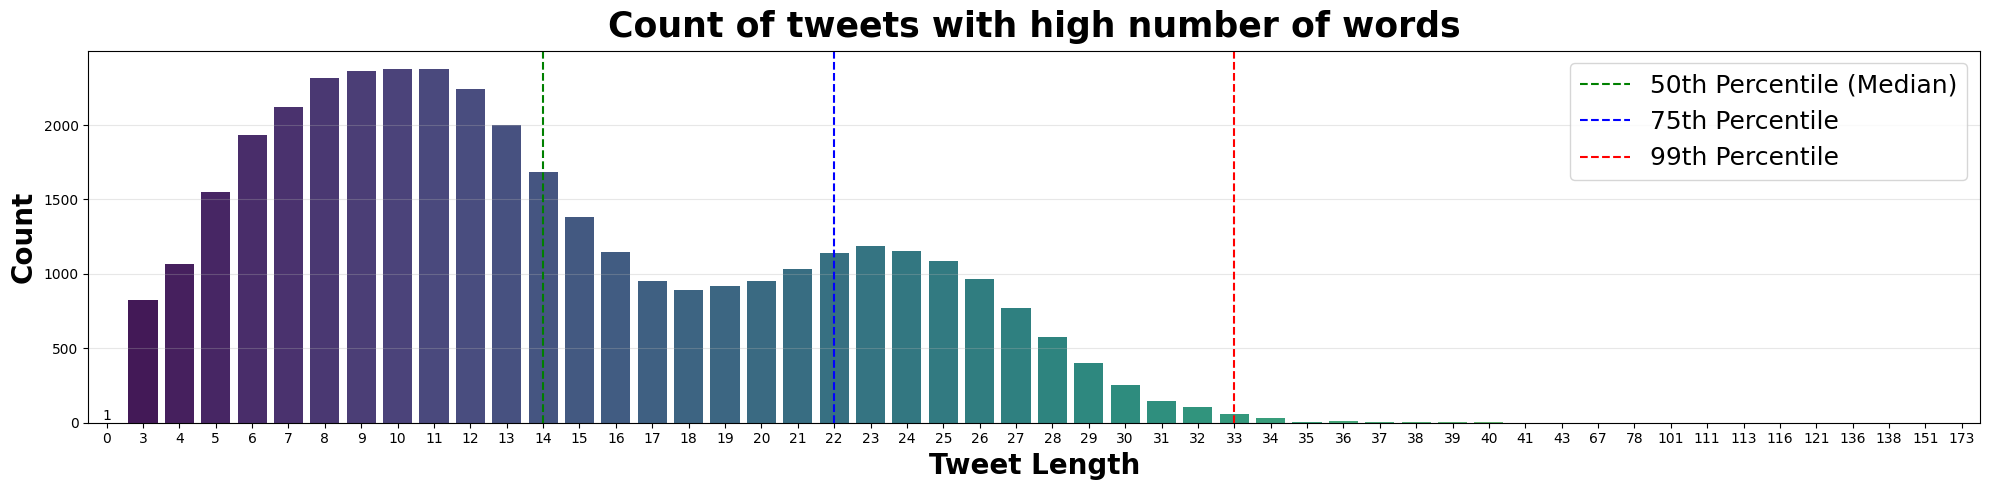

In [61]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='text_len', data=df, palette='viridis')
plt.title('Count of tweets with high number of words', fontsize=25)
ax.bar_label(ax.containers[0])
plt.ylabel('Count', fontsize=20)
plt.xlabel('Tweet Length', fontsize=20)
ax.yaxis.grid(True, alpha=0.3)

q1 = np.percentile(df['text_len'], 25)
q2 = np.percentile(df['text_len'], 50)
q3 = np.percentile(df['text_len'], 75)
q4 = np.percentile(df['text_len'], 99)


plt.axvline(x=q2, color='green', linestyle='--', label='50th Percentile (Median)')
plt.axvline(x=q3, color='blue', linestyle='--', label='75th Percentile')
plt.axvline(x=q4, color='red', linestyle='--', label='99th Percentile')


plt.legend(fontsize = 18)


plt.show()

In [62]:
df = df[df['text_len'] < df['text_len'].quantile(0.995)]

In [63]:
df['sentiment'].value_counts()

sentiment
religion             7834
age                  7759
not_cyberbullying    7626
ethnicity            7343
gender               7242
Name: count, dtype: int64

In [64]:
max_len = np.max(df['text_len'])
max_len

31

In [65]:
df.sort_values(by=['text_len'],ascending=False)

text          sentiment  \
38072  I remember digging them Ours,a joke it's an or...                age   
15785  tyler the creator got cancelled for using the ...             gender   
44230  Ok, but ac dc, guns n roses etc. can have all ...          ethnicity   
22393  Yeah right! Like Punjabi Pakistanis cutting th...           religion   
18090  Yes my dear friend u r right ,is whole society...           religion   
...                                                  ...                ...   
12850                   How annoying is this Kat on #mkr             gender   
2034                          School is fucking boring 👎  not_cyberbullying   
2033             @WVTVW Thanks for parading your racism.  not_cyberbullying   
18714  @Qoloob4 @Vandaliser @sajid_fairooz @IsraeliRe...           religion   
6      Itu sekolah ya bukan tempat bully! Ga jauh kay...  not_cyberbullying   

                                              text_clean  text_len  
38072  remember digging oursa joke order chairman mao...        31  
15785  tyler creator got cancelled using word fag moc...        31  
44230  ok ac dc gun rose etc type vulgar misogynistic...        31  
22393  yeah right like punjabi pakistani cutting balo...        31  
18090  yes dear friend right whole society jihadist i...        31  
...                                                  ...       ...  
12850                                   annoying kat mkr         3  
2034                               school fucking boring         3  
2033                              thanks parading racism         3  
18714                              lie westerner created         3  
6                                                                0  

[37804 rows x 4 columns]

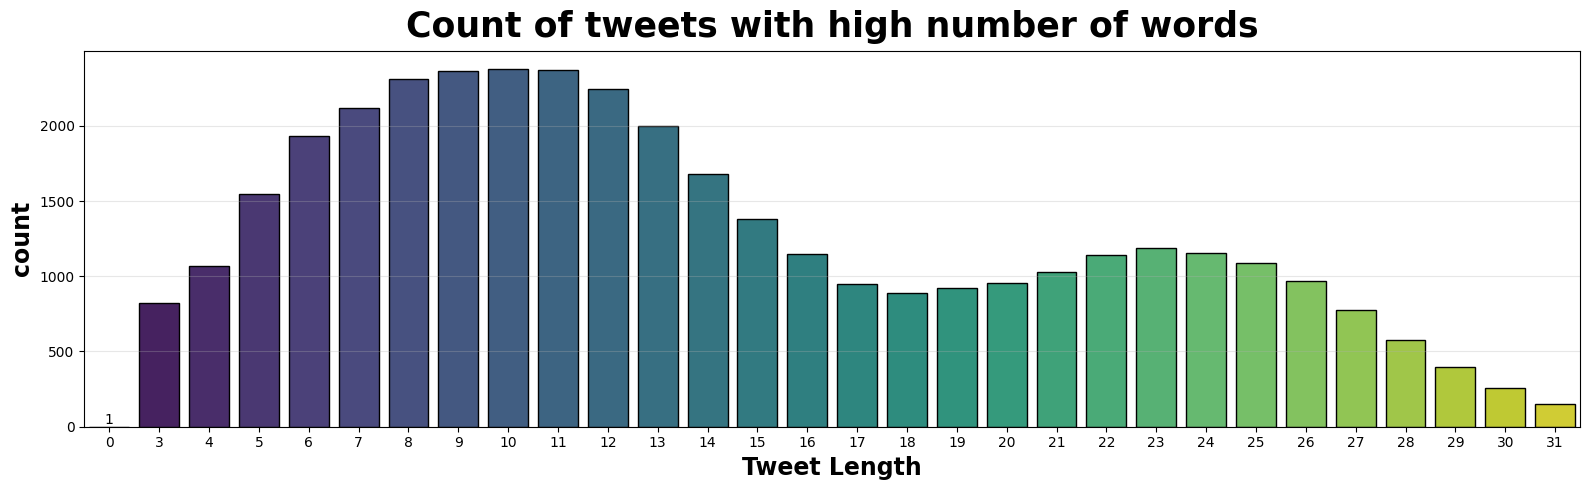

In [66]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='text_len', data=df, edgecolor = 'black',palette='viridis')
plt.title('Count of tweets with high number of words', fontsize=25)
ax.bar_label(ax.containers[0])
plt.ylabel('count', fontsize = 17)
plt.xlabel('Tweet Length', fontsize = 17)
ax.yaxis.grid(True, alpha = 0.3)
plt.show()

In [67]:
df['sentiment_code'] = df['sentiment'].replace({'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4})

In [68]:
df['sentiment_code'].unique()

array([4, 3, 0, 1, 2])

In [69]:
X = df['text_clean']
y = df['sentiment_code']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed_value, shuffle=True)

In [71]:
(unique,counts) = np.unique(y_train,return_counts=True)
np.asarray((unique,counts)).T

array([[   0, 6267],
       [   1, 6207],
       [   2, 5874],
       [   3, 5794],
       [   4, 6101]])

In [72]:
y_train.value_counts()

sentiment_code
0    6267
1    6207
4    6101
2    5874
3    5794
Name: count, dtype: int64

In [73]:
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in X_train], y_train)), columns = ['text_clean', 'sentiment']);

In [74]:
X_train = train_os['text_clean'].values
y_train = train_os['sentiment'].values

In [75]:
(unique,counts) = np.unique(y_train,return_counts=True)
np.asarray((unique,counts)).T

array([[   0, 6267],
       [   1, 6267],
       [   2, 6267],
       [   3, 6267],
       [   4, 6267]])

In [76]:
clf = CountVectorizer()
X_train_cv = clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)

In [77]:
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

In [78]:
def perform_grid_search(clf,param_grid,X,y):
  grid_search = GridSearchCV(estimator=clf,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
  grid_search.fit(X,y)
  best_params = grid_search.best_params_
  best_score = grid_search.best_score_
  print('Best Parameters:',best_params)
  print('Best Accuracy Score:',best_score)
  return grid_search

In [79]:
def conf_matrix(y,y_pred,title,labels):
    fig, ax =plt.subplots(figsize=(6.5,6.5))
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="viridis", fmt='g', cbar=False, annot_kws={"size":20})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=15.5)
    ax.yaxis.set_ticklabels(labels, fontsize=15.5)
    ax.set_ylabel('Test', fontsize=15)
    ax.set_xlabel('Predicted', fontsize=15)

    file_name = f"{title}_confusion_matrix.svg"
    plt.show()


In [80]:
list_of_evaluations = []
runtime = {}

In [81]:
start_time = time.time()

rf_clf = RandomForestClassifier(n_estimators=150)
rf_clf.fit(X_train_tf,y_train)
end_time = time.time()
runtime['RF'] = end_time - start_time

In [82]:
runtime

{'RF': 87.04774045944214}

Classification Report for Random Forest:
               precision    recall  f1-score   support

    religion       0.96      0.96      0.96      1567
         age       0.98      0.97      0.97      1552
   ethnicity       0.99      0.98      0.98      1469
      gender       0.95      0.86      0.90      1448
not bullying       0.82      0.90      0.86      1525

    accuracy                           0.93      7561
   macro avg       0.94      0.93      0.93      7561
weighted avg       0.94      0.93      0.94      7561



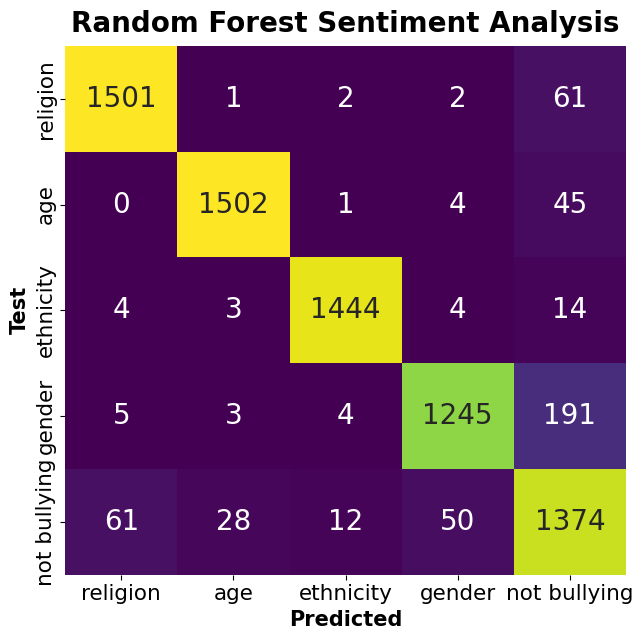

In [83]:
rf_pred = rf_clf.predict(X_test_tf)

print('Classification Report for Random Forest:\n',classification_report(y_test,rf_pred,target_names=sentiments))
conf_matrix(y_test,rf_pred,'Random Forest Sentiment Analysis',sentiments)

Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

    religion       0.96      0.94      0.95      1567
         age       0.99      0.96      0.97      1552
   ethnicity       0.99      0.98      0.98      1469
      gender       0.95      0.85      0.90      1448
not bullying       0.79      0.92      0.85      1525

    accuracy                           0.93      7561
   macro avg       0.94      0.93      0.93      7561
weighted avg       0.94      0.93      0.93      7561



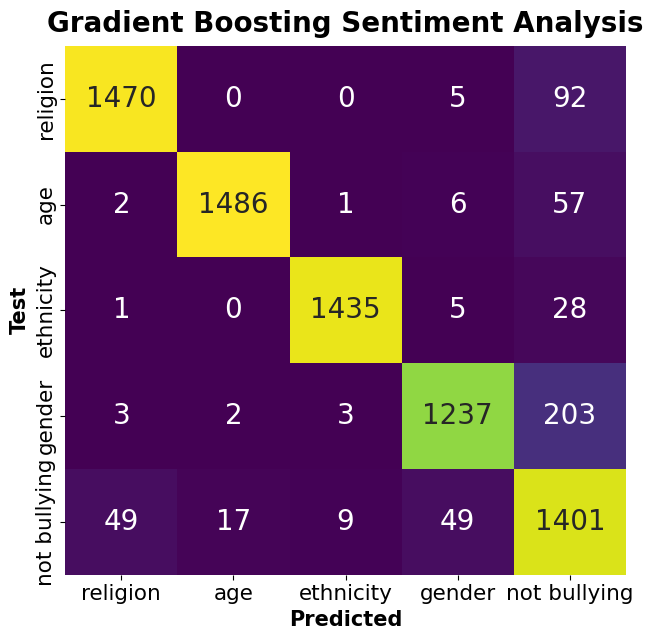

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=34583)
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)



start_time = time.time()

gb_clf = GradientBoostingClassifier(n_estimators=150)
gb_clf.fit(X_train_tf, y_train)
end_time = time.time()

runtime['GB'] = end_time - start_time

gb_pred = gb_clf.predict(X_test_tf)

print('Classification Report for Gradient Boosting:\n',classification_report(y_test, gb_pred, target_names=sentiments))
conf_matrix(y_test,gb_pred,'Gradient Boosting Sentiment Analysis', sentiments)

In [85]:
nb_param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
}
start_time = time.time()
clf = MultinomialNB()

nb_clf = perform_grid_search(clf, nb_param_grid, X_train_tf, y_train)
end_time = time.time()
runtime['NB'] = end_time - start_time

Best Parameters: {'alpha': 0.5}
Best Accuracy Score: 0.8530716451252592


Classification Report for Naive Bayes:
               precision    recall  f1-score   support

    religion       0.84      0.96      0.89      1567
         age       0.82      0.96      0.89      1552
   ethnicity       0.89      0.92      0.90      1469
      gender       0.87      0.87      0.87      1448
not bullying       0.85      0.55      0.67      1525

    accuracy                           0.85      7561
   macro avg       0.85      0.85      0.84      7561
weighted avg       0.85      0.85      0.84      7561



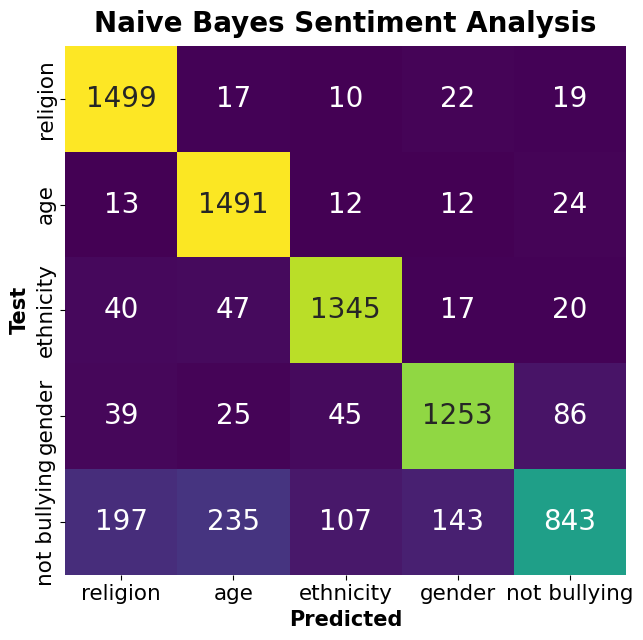

In [86]:
nb_pred = nb_clf.predict(X_test_tf)

print('Classification Report for Naive Bayes:\n',classification_report(y_test, nb_pred, target_names=sentiments))
conf_matrix(y_test,nb_pred,'Naive Bayes Sentiment Analysis', sentiments)

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

    religion       0.96      0.95      0.95      1567
         age       0.94      0.96      0.95      1552
   ethnicity       0.97      0.97      0.97      1469
      gender       0.95      0.87      0.90      1448
not bullying       0.81      0.86      0.83      1525

    accuracy                           0.92      7561
   macro avg       0.93      0.92      0.92      7561
weighted avg       0.93      0.92      0.92      7561



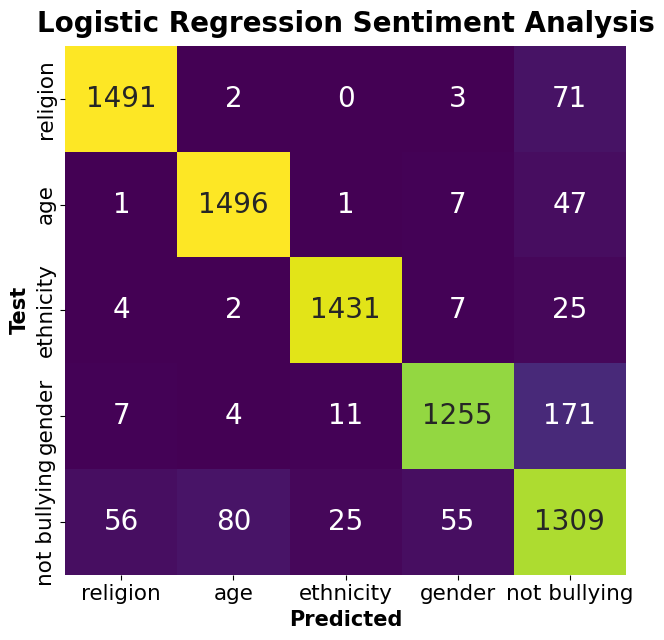

In [87]:
start_time = time.time()

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train_tf, y_train)

end_time = time.time()
runtime['LR'] = end_time - start_time

lr_pred = lr_clf.predict(X_test_tf)

print('Classification Report for Logistic Regression:\n',classification_report(y_test, lr_pred, target_names=sentiments))

conf_matrix(y_test,lr_pred,'Logistic Regression Sentiment Analysis', sentiments)

Classification Report for SVM:
               precision    recall  f1-score   support

    religion       0.95      0.96      0.96      1567
         age       0.94      0.97      0.96      1552
   ethnicity       0.97      0.98      0.98      1469
      gender       0.95      0.87      0.91      1448
not bullying       0.82      0.85      0.84      1525

    accuracy                           0.93      7561
   macro avg       0.93      0.93      0.93      7561
weighted avg       0.93      0.93      0.93      7561



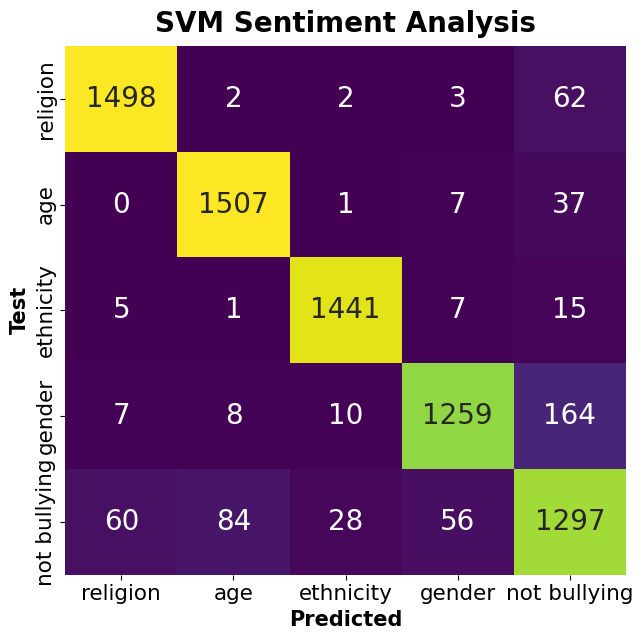

In [88]:
svm_clf = SVC(kernel='sigmoid')
svm_clf.fit(X_train_tf, y_train)




svm_pred = svm_clf.predict(X_test_tf)

print('Classification Report for SVM:\n',classification_report(y_test, svm_pred, target_names=sentiments))

conf_matrix(y_test,svm_pred,'SVM Sentiment Analysis', sentiments)

In [89]:
def get_stacking():

    level0 = []
    level0.append(('DT', LogisticRegression()))
    level0.append(('SVC', SVC(kernel='sigmoid')))
    level0.append(('NB', MultinomialNB(alpha = 0.5)))

    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv = 5)
    return model

In [90]:
start_time = time.time()

stacking_model = get_stacking();

stacking_model.fit(X_train_tf, y_train)

end_time = time.time()
runtime['Stacking'] = end_time - start_time

Classification Report for stacking_model:
               precision    recall  f1-score   support

    religion       0.95      0.96      0.96      1567
         age       0.94      0.97      0.95      1552
   ethnicity       0.97      0.98      0.98      1469
      gender       0.94      0.89      0.91      1448
not bullying       0.84      0.83      0.83      1525

    accuracy                           0.93      7561
   macro avg       0.93      0.93      0.93      7561
weighted avg       0.93      0.93      0.93      7561



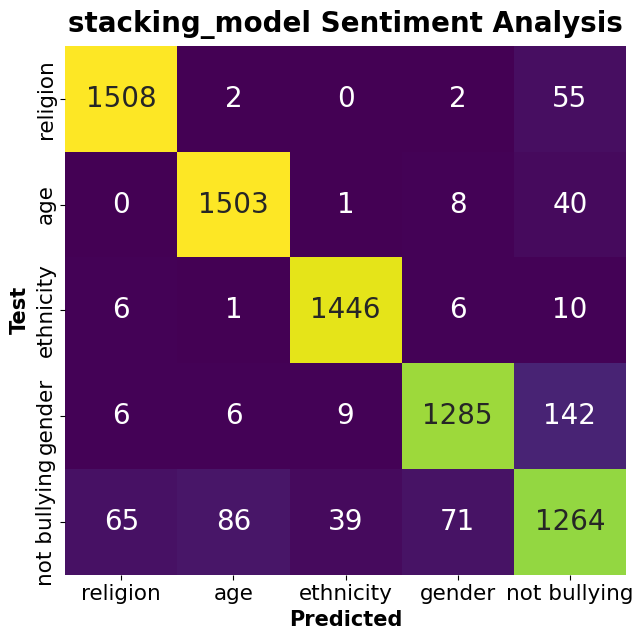

In [91]:
stacking_pred = stacking_model.predict(X_test_tf)

print('Classification Report for stacking_model:\n',classification_report(y_test, stacking_pred, target_names=sentiments))

conf_matrix(y_test,stacking_pred,'stacking_model Sentiment Analysis', sentiments)

In [92]:
runtime

{'RF': 87.04774045944214,
 'GB': 151.12257027626038,
 'NB': 2.2123866081237793,
 'LR': 8.81302285194397,
 'Stacking': 298.22618293762207}

In [93]:
def plotting_funct(history_df, name_of_model):

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    axes[0].plot(history_df["loss"], label="Training")
    axes[0].plot(history_df["val_loss"], label="Validation")
    axes[0].legend()
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Loss = Cross Entropy")
    axes[0].set_title('Losses versus Epoch')
    axes[0].grid(True, alpha=0.2)
    axes[0].set_ylim(0, 1)

    axes[0].scatter(history_df.index, history_df["loss"], c='blue', s=5, alpha=0.5)
    axes[0].scatter(history_df.index, history_df["val_loss"], c='darkorange', s=5, alpha=0.5)

    axes[1].plot(history_df["accuracy"], label="Training")
    axes[1].plot(history_df["val_accuracy"], label="Validation")
    plt.legend()
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Accuracy")
    axes[1].set_title('Accuracy versus Epoch')
    axes[1].grid(True, alpha=0.2)
    axes[1].set_ylim(0, 1)

    axes[1].scatter(history_df.index, history_df["accuracy"], c='blue', s=5, alpha=0.5)
    axes[1].scatter(history_df.index, history_df["val_accuracy"], c='darkorange', s=5, alpha=0.5)

    plt.tight_layout()
    plt.show()

In [94]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.2,stratify=y_train,random_state=seed_value)

In [95]:
(unique,counts) = np.unique(y_train,return_counts=True)
np.asarray((unique,counts)).T

array([[   0, 5013],
       [   1, 5014],
       [   2, 5014],
       [   3, 5013],
       [   4, 5014]])

In [96]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text_clean'])
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_valid_sequences = tokenizer.texts_to_sequences(X_valid)

In [97]:
num_unique_tokens = len(tokenizer.word_index)
print('Number of unique tokens:',num_unique_tokens)

Number of unique tokens: 39360


In [98]:
token_lengths = [len(sequence) for sequence in X_train_sequences]
mean_length = np.mean(token_lengths)
median_length = np.median(token_lengths)
max_length = int(mean_length + 2 * np.std(token_lengths))

print(f"Mean Token Length   : {mean_length}")
print(f"Median Token Length : {median_length}")
print(f"Max Token Length    : {max_length}")

Mean Token Length   : 13.996768788894208
Median Token Length : 12.0
Max Token Length    : 28


In [99]:
max_len

31

In [100]:
max_length = 31
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length,padding='post')
X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length,padding='post')
X_valid_padded = pad_sequences(X_valid_sequences,maxlen=max_length,padding='post')

In [101]:
X_test_padded

array([[  30, 1522, 1498, ...,    0,    0,    0],
       [2927, 6390,  109, ...,    0,    0,    0],
       [  89,   83,    3, ...,    0,    0,    0],
       ...,
       [4520, 4714,  163, ...,    0,    0,    0],
       [  62,  726,   31, ...,    0,    0,    0],
       [1098,    5,  323, ...,    0,    0,    0]], dtype=int32)

In [102]:
embedding_dim = 200
num_classes = 5

In [103]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [104]:
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_len),
    LSTM(units=100, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [105]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_padded,y_train,epochs=10,batch_size=32,validation_data=(X_valid_padded,y_valid),callbacks=[early_stopping])

Epoch 1/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 63s 68ms/step - accuracy: 0.6070 - loss: 0.8863 - val_accuracy: 0.9250 - val_loss: 0.2285
Epoch 2/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.9428 - loss: 0.1875 - val_accuracy: 0.9287 - val_loss: 0.2174
Epoch 3/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 79s 67ms/step - accuracy: 0.9713 - loss: 0.0990 - val_accuracy: 0.9312 - val_loss: 0.2173
Epoch 4/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 85s 71ms/step - accuracy: 0.9832 - loss: 0.0586 - val_accuracy: 0.9261 - val_loss: 0.2433
Epoch 5/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 77s 64ms/step - accuracy: 0.9906 - loss: 0.0344 - val_accuracy: 0.9217 - val_loss: 0.2837
Epoch 6/10
784/784 ━━━━━━━━━━━━━━━━━━━━ 83s 65ms/step - accuracy: 0.9929 - loss: 0.0241 - val_accuracy: 0.9226 - val_loss: 0.3169


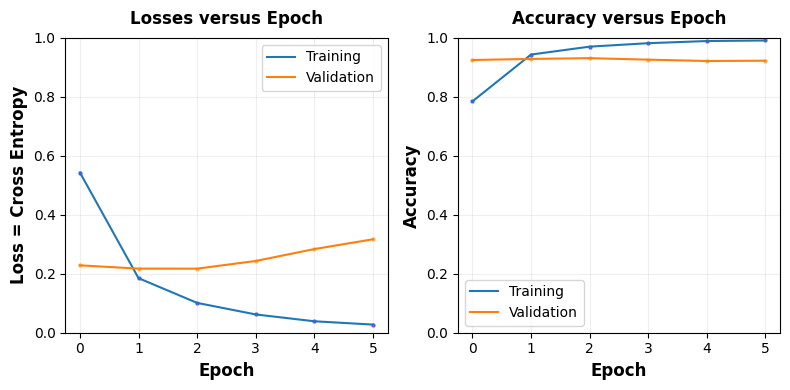

In [106]:
history_df = pd.DataFrame(history.history)
plot = plotting_funct(history_df, 'Simple LSTM')

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
Classification Report for LSTM:
               precision    recall  f1-score   support

    religion       0.93      0.95      0.94      1567
         age       0.98      0.97      0.97      1552
   ethnicity       0.98      0.97      0.97      1469
      gender       0.87      0.90      0.89      1448
not bullying       0.84      0.81      0.83      1525

    accuracy                           0.92      7561
   macro avg       0.92      0.92      0.92      7561
weighted avg       0.92      0.92      0.92      7561



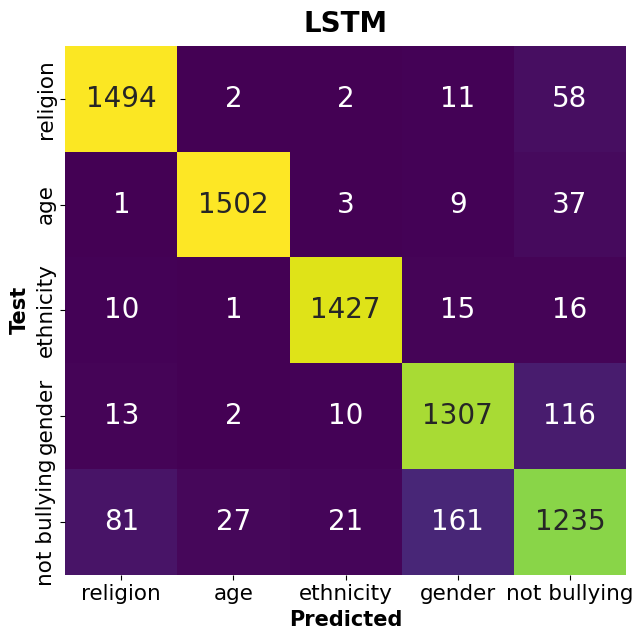

In [107]:
y_pred_probs = model.predict(X_test_padded)
y_pred = np.argmax(y_pred_probs, axis=1)


print('Classification Report for LSTM:\n',classification_report(y_test, y_pred, target_names=sentiments))

conf_matrix(y_test,y_pred,'LSTM', sentiments)

In [108]:
embedding_dim = 200

start_time = time.time()
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1,output_dim=embedding_dim,input_length=max_len),
    LSTM(units=100,dropout=0.5,recurrent_dropout=0.5),
    BatchNormalization(momentum=0.9),
    Dense(units=num_classes,activation='softmax')
])

model.summary()

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_padded,y_train,epochs=10,batch_size=512,validation_data=(X_valid_padded,y_valid),callbacks=[early_stopping])
end_time = time.time()
runtime['LSTM'] = end_time - start_time

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.2939 - loss: 1.5963 - val_accuracy: 0.8725 - val_loss: 0.5955
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.7669 - loss: 0.6487 - val_accuracy: 0.8980 - val_loss: 0.2921
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.8751 - loss: 0.3905 - val_accuracy: 0.9059 - val_loss: 0.2693


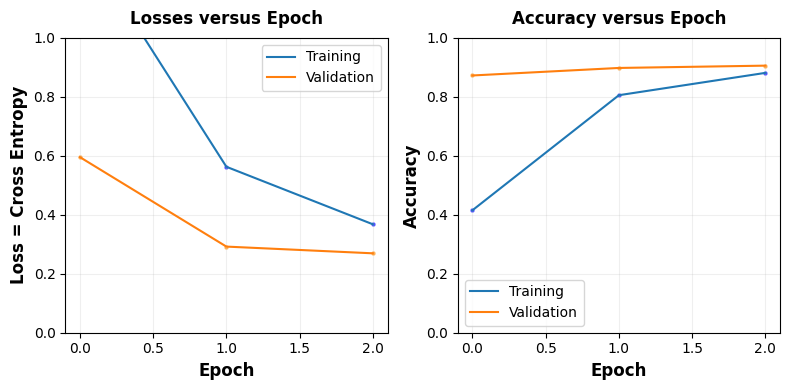

In [109]:
history_df = pd.DataFrame(history.history)
plot = plotting_funct(history_df, 'Simple LSTM')

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
Classification Report for LSTM:
               precision    recall  f1-score   support

    religion       0.97      0.87      0.92      1567
         age       0.97      0.97      0.97      1552
   ethnicity       0.98      0.90      0.94      1469
      gender       0.91      0.72      0.80      1448
not bullying       0.64      0.89      0.75      1525

    accuracy                           0.87      7561
   macro avg       0.90      0.87      0.87      7561
weighted avg       0.90      0.87      0.88      7561



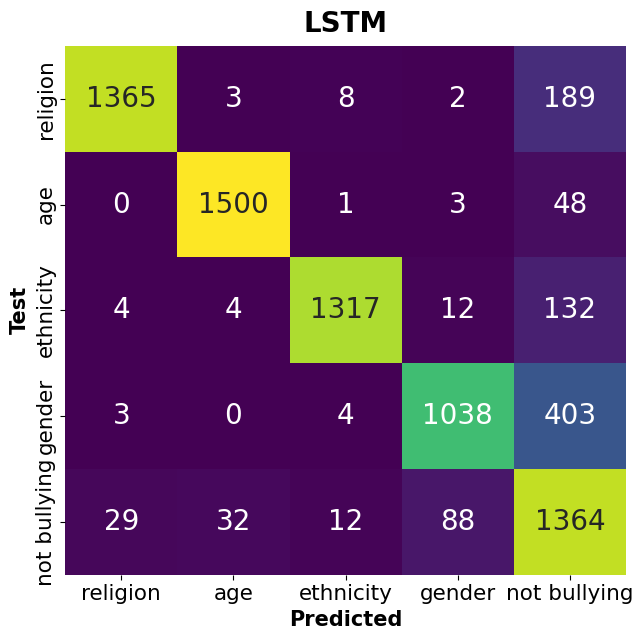

In [110]:
y_pred_probs = model.predict(X_test_padded)
y_pred = np.argmax(y_pred_probs, axis=1)


print('Classification Report for LSTM:\n',classification_report(y_test, y_pred, target_names=sentiments))

conf_matrix(y_test,y_pred,'LSTM', sentiments)

In [111]:
embedding_dim = 200

start_time = time.time()
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1,output_dim=embedding_dim,input_length=max_len),
    GRU(units=100,dropout=0.5,recurrent_dropout=0.5),
    BatchNormalization(momentum=0.9),
    Dense(units=num_classes,activation='softmax')
])

model.summary()

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_padded,y_train,epochs=10,batch_size=512,validation_data=(X_valid_padded,y_valid),callbacks=[early_stopping])
end_time = time.time()
runtime['GRU'] = end_time - start_time

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.2421 - loss: 1.9001 - val_accuracy: 0.2001 - val_loss: 1.6190
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.4163 - loss: 1.4348 - val_accuracy: 0.2001 - val_loss: 1.6259
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.5538 - loss: 1.1597 - val_accuracy: 0.2001 - val_loss: 1.6685


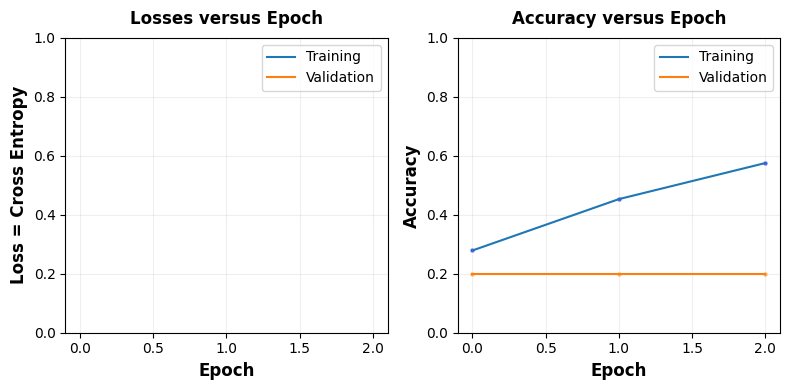

In [112]:
history_df = pd.DataFrame(history.history)
plot = plotting_funct(history_df, 'Simple GRU')

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step
Classification Report for GRU:
               precision    recall  f1-score   support

    religion       0.21      1.00      0.34      1567
         age       0.00      0.00      0.00      1552
   ethnicity       0.00      0.00      0.00      1469
      gender       0.00      0.00      0.00      1448
not bullying       0.00      0.00      0.00      1525

    accuracy                           0.21      7561
   macro avg       0.04      0.20      0.07      7561
weighted avg       0.04      0.21      0.07      7561



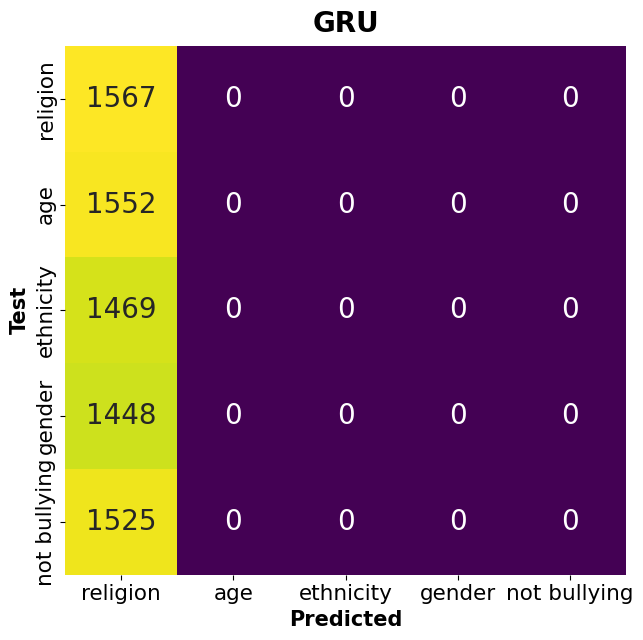

In [113]:
y_pred_probs = model.predict(X_test_padded)
y_pred = np.argmax(y_pred_probs, axis=1)


print('Classification Report for GRU:\n',classification_report(y_test, y_pred, target_names=sentiments))

conf_matrix(y_test,y_pred,'GRU', sentiments)

In [114]:
elements = (' '.join([sentence for sentence in X])).split()

In [115]:
labels = set(y)

In [116]:
def create_lookup_tables(text):

    vocab = set(text)

    vocab_to_int = {word: i for i, word in enumerate(vocab)}
    int_to_vocab = {v:k for k, v in vocab_to_int.items()}

    return vocab_to_int, int_to_vocab

In [117]:
elements.append("<UNK>")

vocab_to_int, int_to_vocab = create_lookup_tables(elements)
labels_to_int, int_to_labels = create_lookup_tables(y)

print("Vocabulary of our dataset: {}".format(len(vocab_to_int)))

Vocabulary of our dataset: 39361


In [118]:
def convert_to_int(data, data_int):

    all_items = []
    for sentence in data:
        all_items.append([data_int[word] if word in data_int else data_int["<UNK>"] for word in sentence.split()])

    return all_items

In [121]:
enc = OneHotEncoder()

enc.fit(y_train.reshape(-1, 1))

y_train_encoded = enc.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_encoded = enc.transform(y_test.to_numpy().reshape(-1, 1)).toarray()
y_valid_encoded = enc.fit_transform(y_valid.reshape(-1, 1)).toarray()

In [122]:
max_sentence_length = 31
dropout = 0.2

In [123]:
path_to_glove_file = 'glove.6B.200d.txt'

In [139]:
embedding_index = {}
with open(path_to_glove_file, encoding = 'utf-8') as f:
    for line in f:
        word, coefs = line.split(maxsplit = 1)
        coefs = np.fromstring(coefs, 'f', sep = ' ')
        embedding_index[word] = coefs
print('Found %s word vectors.' % len(embedding_index))

Found 400000 word vectors.


In [140]:
num_tokens = len(set(elements)) + 2
embedding_dim = 200
hits = 0
misses = 0

In [141]:
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word,i in vocab_to_int.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print('Converted %d words (%d misses)'% (hits, misses))

Converted 24246 words (15115 misses)


In [143]:
model = Sequential()
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer= tf.keras.initializers.constant(embedding_matrix),
    trainable = False,
)
model.add(embedding_layer)
model.add(GRU(100, dropout=0.5, recurrent_dropout=0.5, return_sequences=False))
model.add(BatchNormalization(momentum=0.9))
model.add(Dense(len(labels), activation='softmax'))

In [144]:
start_time = time.time()

optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_padded, y_train_encoded, batch_size=128, epochs=10, validation_data=(X_valid_padded, y_valid_encoded), callbacks=[early_stopping])

end_time = time.time()
runtime['GRU with GloVe'] = end_time - start_time

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 78ms/step - accuracy: 0.2559 - loss: 1.8679 - val_accuracy: 0.1999 - val_loss: 1.6206
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.4170 - loss: 1.4026 - val_accuracy: 0.1999 - val_loss: 1.6268
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.4674 - loss: 1.2983 - val_accuracy: 0.1999 - val_loss: 1.6275


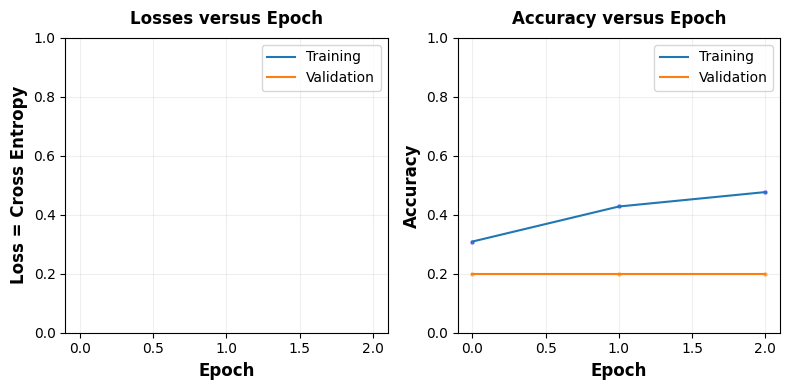

In [145]:
history_df = pd.DataFrame(history.history)
plot = plotting_funct(history_df, 'GRU with GloVe Embedding')

In [146]:
int_to_labels = {4: 'religion', 0: 'age', 1: 'ethnicity', 2: 'gender', 3: 'not_cyberbullying'}

y_pred_categories = [int_to_labels[pred] for pred in y_pred]

In [147]:
y_test_numerical = np.argmax(y_test_encoded, axis=1)

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step
Classification Report for GRU with Glove Embedding:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      0.20      0.34      7561

    accuracy                           0.20      7561
   macro avg       0.20      0.04      0.07      7561
weighted avg       1.00      0.20      0.34      7561



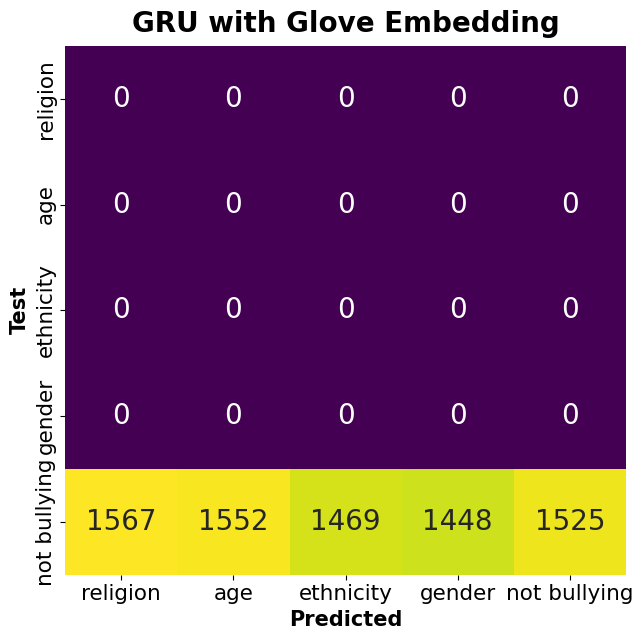

In [148]:
y_pred_probs = model.predict(X_test_padded)
y_pred = np.argmax(y_pred_probs, axis=1)

print('Classification Report for GRU with Glove Embedding:\n',classification_report(y_pred, y_test))
sentiments2 = ["age","ethnicity","gender","not bullying","religion"]
conf_matrix(y_pred, y_test,'GRU with Glove Embedding',sentiments)

In [149]:
scores = model.evaluate(X_test_padded, y_test_encoded, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 20.17%


In [150]:
def Tokenize(column, seq_len):
    corpus = [word for text in column for word in text.split()]
    count_words = Counter(corpus)
    sorted_words = count_words.most_common()
    vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

    text_int = []
    for text in column:
        r = [vocab_to_int[word] for word in text.split()]
        text_int.append(r)
    features = np.zeros((len(text_int), seq_len), dtype = int)
    for i, review in enumerate(text_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
            new = review[: seq_len]
        features[i, :] = np.array(new)

    return sorted_words, features

In [151]:
vocabulary, tokenized_column = Tokenize(df["text_clean"], max_len)

In [152]:
keys = []
values = []
for key, value in vocabulary[:20]:
    keys.append(key)
    values.append(value)

In [153]:
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

In [154]:
EMBEDDING_DIM = 200


In [155]:
word2vec_model = Word2Vec(Word2vec_train_data, vector_size=EMBEDDING_DIM)

In [156]:
print(f"Vocabulary size: {len(vocabulary) + 1}")


Vocabulary size: 39361


In [157]:
VOCAB_SIZE = len(vocabulary) + 1


In [158]:
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))

for word, token in vocabulary:
    if word in word2vec_model.wv.key_to_index:
        embedding_vector = word2vec_model.wv[word]
        embedding_matrix[token] = embedding_vector

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (39361, 200)


In [159]:
X = tokenized_column
y = df['sentiment_code'].values

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed_value)

In [161]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=seed_value)

In [162]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 5013],
       [   1, 4966],
       [   2, 4699],
       [   3, 4635],
       [   4, 4881]])

In [163]:
ros = RandomOverSampler()
X_train_os, y_train_os = ros.fit_resample(np.array(X_train),np.array(y_train))

In [164]:
(unique, counts) = np.unique(y_train_os, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 5013],
       [   1, 5013],
       [   2, 5013],
       [   3, 5013],
       [   4, 5013]])

In [165]:
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
valid_data = TensorDataset(torch.from_numpy(X_valid), torch.from_numpy(y_valid))

In [166]:
BATCH_SIZE = 32

In [167]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=False, batch_size=BATCH_SIZE, drop_last=True)
test_loader = DataLoader(test_data, shuffle=False, batch_size=BATCH_SIZE, drop_last=True)

In [168]:
class Attention(nn.Module):
    def __init__(self, hidden_dim, is_bidirectional):
        super(Attention, self).__init__()
        self.is_bidirectional = is_bidirectional
        self.attn = nn.Linear(hidden_dim * (4 if is_bidirectional else 2), hidden_dim * (2 if is_bidirectional else 1))
        self.v = nn.Linear(hidden_dim * (2 if is_bidirectional else 1), 1, bias=False)

    def forward(self, hidden, encoder_outputs):
        seq_len = encoder_outputs.size(1)
        if self.is_bidirectional:
            hidden = torch.cat((hidden[-2], hidden[-1]), dim=-1)
        else:
            hidden = hidden[-1]
        hidden_repeated = hidden.unsqueeze(1).repeat(1, seq_len, 1)
        attn_weights = torch.tanh(self.attn(torch.cat((hidden_repeated, encoder_outputs), dim=2)))
        attn_weights = self.v(attn_weights).squeeze(2)
        return nn.functional.softmax(attn_weights, dim=1)

In [169]:
class GRU_Sentiment_Classifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes, gru_layers, dropout, is_bidirectional):
        super(GRU_Sentiment_Classifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = gru_layers
        self.is_bidirectional = is_bidirectional

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, gru_layers, batch_first=True, bidirectional=is_bidirectional)
        self.attention = Attention(hidden_dim, is_bidirectional)
        self.fc = nn.Linear(hidden_dim * (2 if is_bidirectional else 1), num_classes)
        self.softmax = nn.LogSoftmax(dim=1)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, hidden):
        embedded = self.embedding(x)
        out, hidden = self.gru(embedded, hidden)
        attn_weights = self.attention(hidden, out)
        context = attn_weights.unsqueeze(1).bmm(out).squeeze(1)
        out = self.softmax(self.fc(context))
        return out, hidden

    def init_hidden(self, batch_size):
        factor = 2 if self.is_bidirectional else 1
        h0 = torch.zeros(self.num_layers * factor, batch_size, self.hidden_dim).to(DEVICE)
        return h0

In [170]:
NUM_CLASSES = 5
HIDDEN_DIM = 100
GRU_LAYERS = 1

IS_BIDIRECTIONAL = False

LR = 4e-4
DROPOUT = 0.5
EPOCHS = 10

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

model = GRU_Sentiment_Classifier(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_DIM, NUM_CLASSES, GRU_LAYERS, DROPOUT, IS_BIDIRECTIONAL)

model = model.to(DEVICE)

model.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
model.embedding.weight.requires_grad = True

criterion = nn.NLLLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=5e-6)

print(model)

GRU_Sentiment_Classifier(
  (embedding): Embedding(39361, 200)
  (gru): GRU(200, 100, batch_first=True)
  (attention): Attention(
    (attn): Linear(in_features=200, out_features=100, bias=True)
    (v): Linear(in_features=100, out_features=1, bias=False)
  )
  (fc): Linear(in_features=100, out_features=5, bias=True)
  (softmax): LogSoftmax(dim=1)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [171]:
total_step = len(train_loader)
total_step_val = len(valid_loader)

early_stopping_patience = 4
early_stopping_counter = 0

start_time = time.time()

valid_acc_max = 0

for e in range(EPOCHS):

    train_loss, valid_loss = [], []
    train_acc, valid_acc = [], []

    y_train_list, y_val_list = [], []

    correct, correct_val = 0, 0
    total, total_val = 0, 0
    running_loss, running_loss_val = 0, 0

    model.train()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

        h = model.init_hidden(labels.size(0))

        model.zero_grad()

        output, h = model(inputs, h)

        loss = criterion(output, labels)
        loss.backward()

        running_loss += loss.item()

        optimizer.step()

        y_pred_train = torch.argmax(output, dim=1)
        y_train_list.extend(y_pred_train.squeeze().tolist())

        correct += torch.sum(y_pred_train == labels).item()
        total += labels.size(0)

    train_loss.append(running_loss / total_step)
    train_acc.append(100 * correct / total)

    with torch.no_grad():

        model.eval()

        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            val_h = model.init_hidden(labels.size(0))

            output, val_h = model(inputs, val_h)

            val_loss = criterion(output, labels)
            running_loss_val += val_loss.item()

            y_pred_val = torch.argmax(output, dim=1)
            y_val_list.extend(y_pred_val.squeeze().tolist())

            correct_val += torch.sum(y_pred_val == labels).item()
            total_val += labels.size(0)

        valid_loss.append(running_loss_val / total_step_val)
        valid_acc.append(100 * correct_val / total_val)

    if np.mean(valid_acc) >= valid_acc_max:
        torch.save(model.state_dict(), './state_dict.pt')
        print(f'Epoch {e+1}:Validation accuracy increased ({valid_acc_max:.6f} --> {np.mean(valid_acc):.6f}).  Saving model ...')
        valid_acc_max = np.mean(valid_acc)
        early_stopping_counter = 0
    else:
        print(f'Epoch {e+1}:Validation accuracy did not increase')
        early_stopping_counter += 1

    if early_stopping_counter > early_stopping_patience:
        print('Early stopped at epoch :', e+1)
        break

    print(f'\tTrain_loss : {np.mean(train_loss):.4f} Val_loss : {np.mean(valid_loss):.4f}')
    print(f'\tTrain_acc : {np.mean(train_acc):.3f}% Val_acc : {np.mean(valid_acc):.3f}%')

end_time = time.time()
runtime['GRU with Word2Vec & Attention'] = end_time - start_time

Epoch 1:Validation accuracy increased (0.000000 --> 91.865079).  Saving model ...
	Train_loss : 0.5723 Val_loss : 0.2394
	Train_acc : 77.918% Val_acc : 91.865%
Epoch 2:Validation accuracy increased (91.865079 --> 92.939815).  Saving model ...
	Train_loss : 0.1649 Val_loss : 0.2130
	Train_acc : 94.552% Val_acc : 92.940%
Epoch 3:Validation accuracy did not increase
	Train_loss : 0.0946 Val_loss : 0.2454
	Train_acc : 97.032% Val_acc : 92.014%
Epoch 4:Validation accuracy did not increase
	Train_loss : 0.0503 Val_loss : 0.3073
	Train_acc : 98.454% Val_acc : 91.055%
Epoch 5:Validation accuracy did not increase
	Train_loss : 0.0290 Val_loss : 0.3724
	Train_acc : 99.161% Val_acc : 90.509%
Epoch 6:Validation accuracy did not increase
	Train_loss : 0.0211 Val_loss : 0.4017
	Train_acc : 99.417% Val_acc : 90.377%
Epoch 7:Validation accuracy did not increase
Early stopped at epoch : 7


In [172]:
model.load_state_dict(torch.load('./state_dict.pt'))

<All keys matched successfully>

In [173]:
def evaluate_model(model, test_loader):
    model.eval()
    y_pred_list = []
    y_test_list = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            test_h = model.init_hidden(labels.size(0))

            output, val_h = model(inputs, test_h)
            y_pred_test = torch.argmax(output, dim=1)
            y_pred_list.extend(y_pred_test.squeeze().tolist())
            y_test_list.extend(labels.squeeze().tolist())

    return y_pred_list, y_test_list

y_pred_list, y_test_list = evaluate_model(model, test_loader)

In [174]:
print('Classification Report for GRU :\n', classification_report(y_test_list, y_pred_list, target_names=sentiments))

Classification Report for GRU :
               precision    recall  f1-score   support

    religion       0.94      0.96      0.95      1567
         age       0.98      0.96      0.97      1548
   ethnicity       0.97      0.98      0.98      1466
      gender       0.95      0.85      0.90      1447
not bullying       0.81      0.89      0.85      1524

    accuracy                           0.93      7552
   macro avg       0.93      0.93      0.93      7552
weighted avg       0.93      0.93      0.93      7552



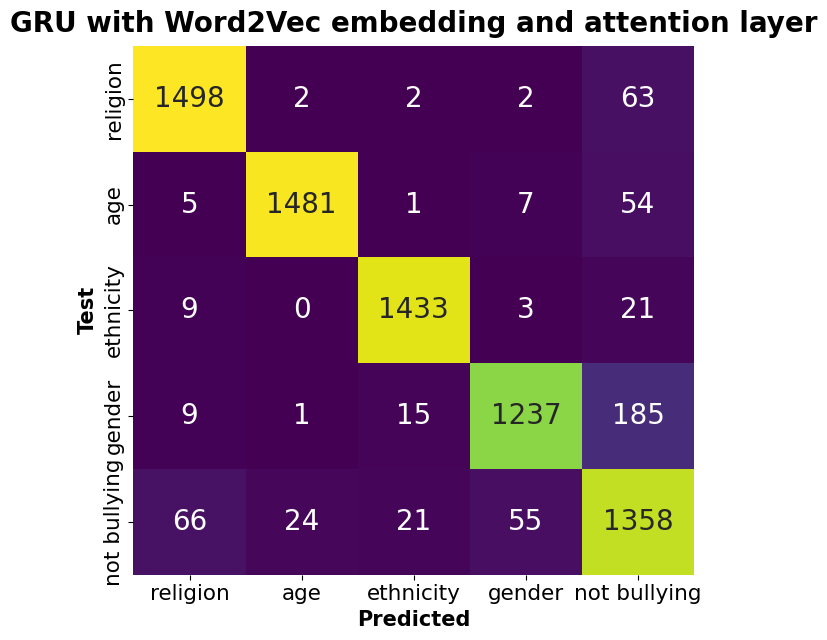

In [175]:
conf_matrix(y_test_list,y_pred_list,'GRU with Word2Vec embedding and attention layer', sentiments)

In [176]:
evaluation = {}
evaluation['Model'] = 'GRU (Word2Veb & Attention)'
evaluation['Accuracy'] = accuracy_score(y_test_list, y_pred_list)
evaluation['Precision'] = precision_score(y_test_list, y_pred_list, average='macro')
evaluation['Recall'] = recall_score(y_test_list, y_pred_list, average='macro')
evaluation['F1-score'] = f1_score(y_test_list, y_pred_list, average='macro')

list_of_evaluations.append(evaluation)